# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta

import yfinance as yf
import seaborn as sns



# Load and Convert DataSet

In [31]:
tck = yf.Ticker("INTC")
start_date = "1995-08-1"
end_date = "2025-08-10"
df = tck.history(start = start_date, end = end_date)
df

Open       High        Low      Close  \
Date                                                                    
1995-08-01 00:00:00-04:00   4.579951   4.579951   4.403799   4.456645   
1995-08-02 00:00:00-04:00   4.535913   4.579951   4.298108   4.333338   
1995-08-03 00:00:00-04:00   4.210034   4.421416   4.165996   4.377378   
1995-08-04 00:00:00-04:00   4.386186   4.439032   4.350956   4.368571   
1995-08-07 00:00:00-04:00   4.403800   4.500684   4.386185   4.474261   
...                              ...        ...        ...        ...   
2025-08-04 00:00:00-04:00  19.520000  19.590000  19.350000  19.500000   
2025-08-05 00:00:00-04:00  19.700001  20.540001  19.680000  20.190001   
2025-08-06 00:00:00-04:00  20.120001  20.480000  19.870001  20.410000   
2025-08-07 00:00:00-04:00  20.000000  20.440001  19.600000  19.770000   
2025-08-08 00:00:00-04:00  20.000000  20.020000  19.610001  19.950001   

                              Volume  Dividends  Stock Splits  
Date                                                           
1995-08-01 00:00:00-04:00   94556800        0.0           0.0  
1995-08-02 00:00:00-04:00  135620800        0.0           0.0  
1995-08-03 00:00:00-04:00  117961600        0.0           0.0  
1995-08-04 00:00:00-04:00   68723200        0.0           0.0  
1995-08-07 00:00:00-04:00   51580000        0.0           0.0  
...                              ...        ...           ...  
2025-08-04 00:00:00-04:00   69249400        0.0           0.0  
2025-08-05 00:00:00-04:00   97338200        0.0           0.0  
2025-08-06 00:00:00-04:00   67074200        0.0           0.0  
2025-08-07 00:00:00-04:00  131382800        0.0           0.0  
2025-08-08 00:00:00-04:00   75415000        0.0           0.0  

[7556 rows x 7 columns]

In [3]:
col_close = df.pop("Close")
df.insert(0, "Close", col_close)
df.head()

Close      Open      High       Low     Volume  \
Date                                                                           
1995-08-01 00:00:00-04:00  4.456647  4.579953  4.579953  4.403801   94556800   
1995-08-02 00:00:00-04:00  4.333340  4.535915  4.579953  4.298109  135620800   
1995-08-03 00:00:00-04:00  4.377378  4.210033  4.421416  4.165995  117961600   
1995-08-04 00:00:00-04:00  4.368570  4.386186  4.439031  4.350955   68723200   
1995-08-07 00:00:00-04:00  4.474261  4.403800  4.500684  4.386185   51580000   

                           Dividends  Stock Splits  
Date                                                
1995-08-01 00:00:00-04:00        0.0           0.0  
1995-08-02 00:00:00-04:00        0.0           0.0  
1995-08-03 00:00:00-04:00        0.0           0.0  
1995-08-04 00:00:00-04:00        0.0           0.0  
1995-08-07 00:00:00-04:00        0.0           0.0

In [4]:
df.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [5]:
columns = ["Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"]

## Data Preprocessing

In [6]:
def check_df(df: object, head: object=5) -> object:
    print("\nShape of data frame")
    print(df.shape)
    print("\nTypes of data frame")
    print(df.dtypes)
    print("\nNaN values")
    print(df.isnull().sum())
    print("\nInfomation of data frame")
    print(df.info())

check_df(df)


Shape of data frame
(7556, 7)

Types of data frame
Close           float64
Open            float64
High            float64
Low             float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

NaN values
Close           0
Open            0
High            0
Low             0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Infomation of data frame
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7556 entries, 1995-08-01 00:00:00-04:00 to 2025-08-08 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close         7556 non-null   float64
 1   Open          7556 non-null   float64
 2   High          7556 non-null   float64
 3   Low           7556 non-null   float64
 4   Volume        7556 non-null   int64  
 5   Dividends     7556 non-null   float64
 6   Stock Splits  7556 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 472.2

In [7]:
df["Volume"] = df["Volume"].astype("float64")

In [8]:
#Check the duplicated row
print("Number of duplicated rows: ", len(df[df.duplicated()]))

Number of duplicated rows:  0


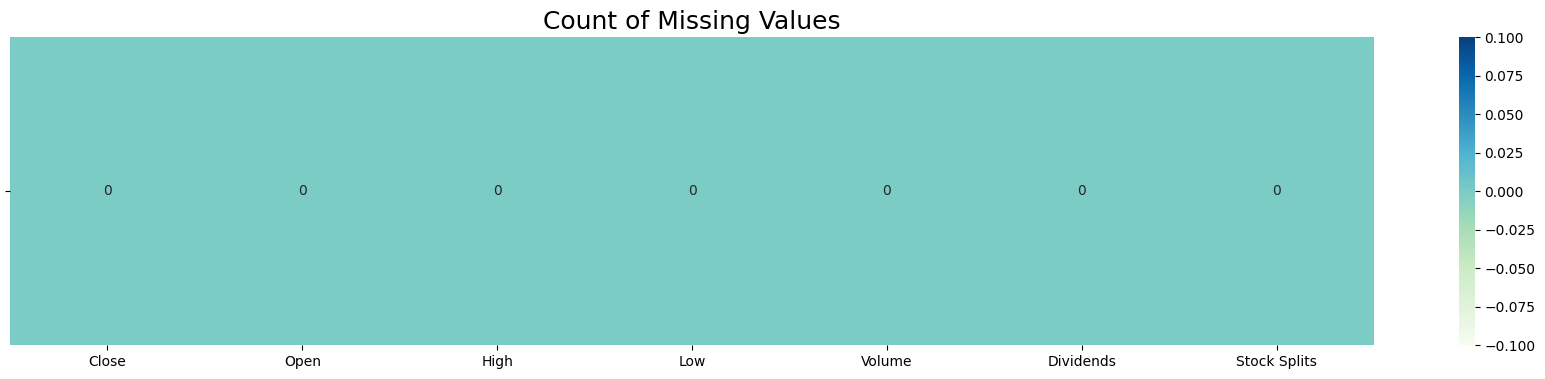

In [9]:
# Count the missing values by columns
plt.figure(figsize = (22, 4))
sns.heatmap((df.isna().sum()).to_frame(name='').T, cmap="GnBu", annot=True, fmt='0.0f').set_title("Count of Missing Values", fontsize = 18)
plt.show()


Không có sự trùng lặp dữ liệu và dữ liệu NaN

##### Bảng thông tin thống kê dữ liệu.

In [10]:
df.describe().T.style.background_gradient(cmap="BuGn", axis=1)

In [11]:
# Tim du lieu duy nhat
df.apply(lambda x: len(x.unique()))

Close           6944
Open            7496
High            7495
Low             7505
Volume          7532
Dividends         26
Stock Splits       2
dtype: int64

# Data Visualization

## Analysis of Correlations

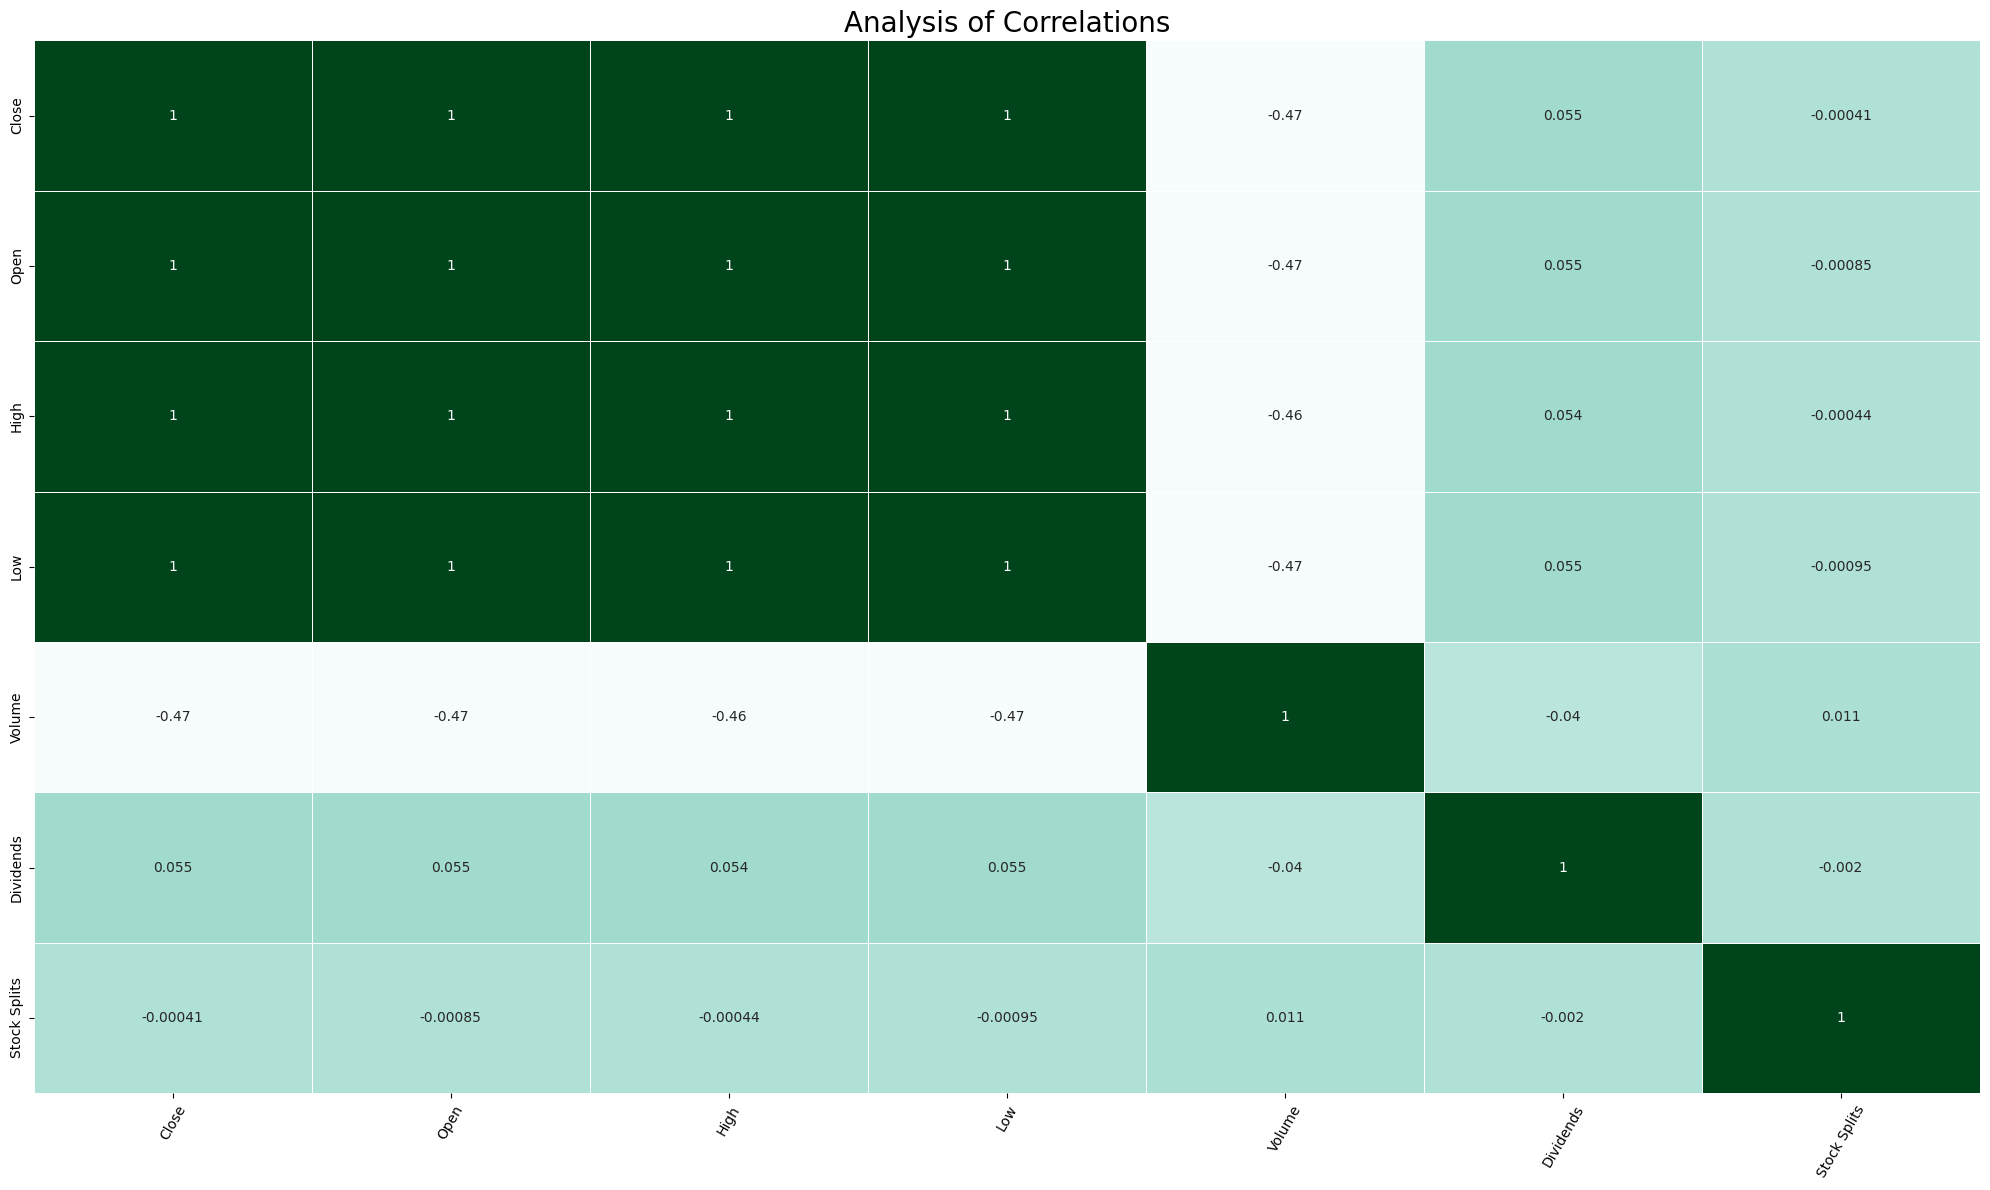

In [12]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), cmap="BuGn", annot=True, linewidths=.6, cbar=False)
plt.xticks(rotation = 60, size = 10)
plt.yticks(size=10)
plt.title("Analysis of Correlations", size=20)
plt.tight_layout()
plt.show()

- Tính tương quan giữa các biến giá cổ phiếu (Close, Open, High, Low):
    * Các mối quan hệ tương quan giữa 4 giá trị cổ phiếu này có giá trị bằng 1. Thể hiện một mối tương quan hoàn hảo và tích cực giữa chúng.
    * Các giá cổ phiếu có xu hướng hoạt động cùng chiều một cách chặt chẽ. Điều này được xác định một cách chính xác vì các mức giá này đều được mở bán trong cùng một thời gian giao dịch.
- Tính tương quan giữa các biến (Close, Open, High, Low) với các biến (Volume, Dividends, Stock Splits):
    * Với Volume: Các giá trị tương quan đều là -0.47~-0.46. Đây là tính tương quan tiêu cực và yếu. Điều này cho thấy có mối liên hệ yếu, khi giá tăng, khối lượng giao dịch có xu hướng giảm một chút, và ngược lại (Mối quan hệ này không mạnh).
    * Với Dividends: Các gia trị tương quan đều nằm ở mức 0.054. Đây là mức tương quan tích cực và rắt yếu. Mối quan hệ này không có mức ảnh hưởng nhiều đến giá cổ phiếu, cho thấy việc chi trả cổ tức không có mối liên hệ chặt chẽ với sự biến động của giá cổ phiếu.
    * Với Stock Splits: Các giá trị tương quan đều nằm trong mức 0.041~0.042. Đây là mối quan hệ tương quan tiêu cực và cực kỳ yếu. Việc chia tách cổ phiếu gần như không có mối quan hệ tương quan tuyến tính với sự biến động giá.
- Sự tương quan giữa các biến còn lại (Volume, Dividends, Stock Splits):
    * Các giá trị Volume, Dividends, Stock Splits không có mối tương quan liên hệ với nhau nên các giá trị tương quan tiêu cực và cực kỳ yếu.
    * Các ô trên đường chéo chính có giá trị tương quan mạnh mẽ vì một biến luôn tương quan mạnh mẽ với chính nó.

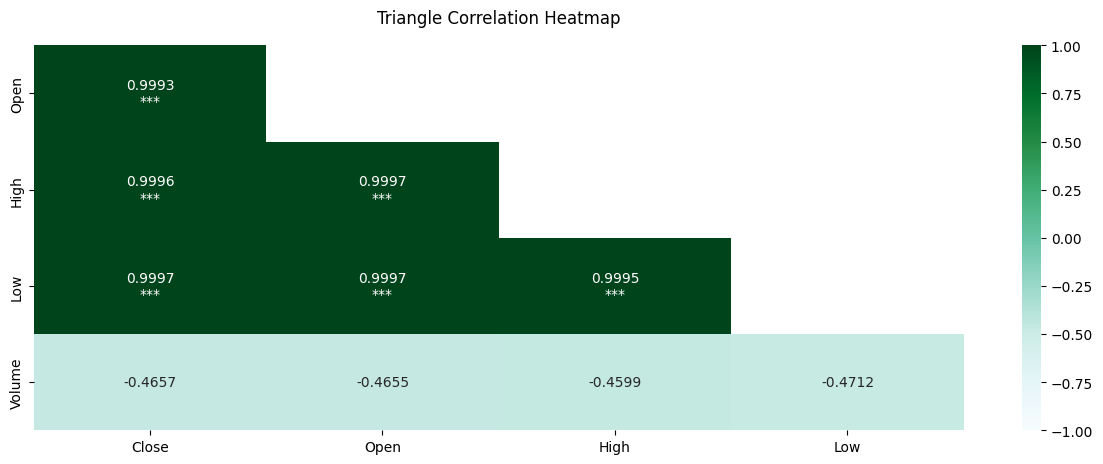

In [13]:
corr = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize = (15,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
cut_off = 0.25
extreme_1 = 0.5
extreme_2 = 0.75
extreme_3 = 0.9
mask |= np.abs(corr) < cut_off
corr = corr[~mask]
remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n*')
          + ('' if abs(val) < extreme_2 else '*')
          + ('' if abs(val) < extreme_3 else '*')
          for val in row] for row in corr.to_numpy()]

heatmap = sns.heatmap(corr, vmin = -1, vmax=1, annot=annot, fmt='', cmap="BuGn")
heatmap.set_title("Triangle Correlation Heatmap", fontdict={'fontsize': 12}, pad = 16)
plt.show()

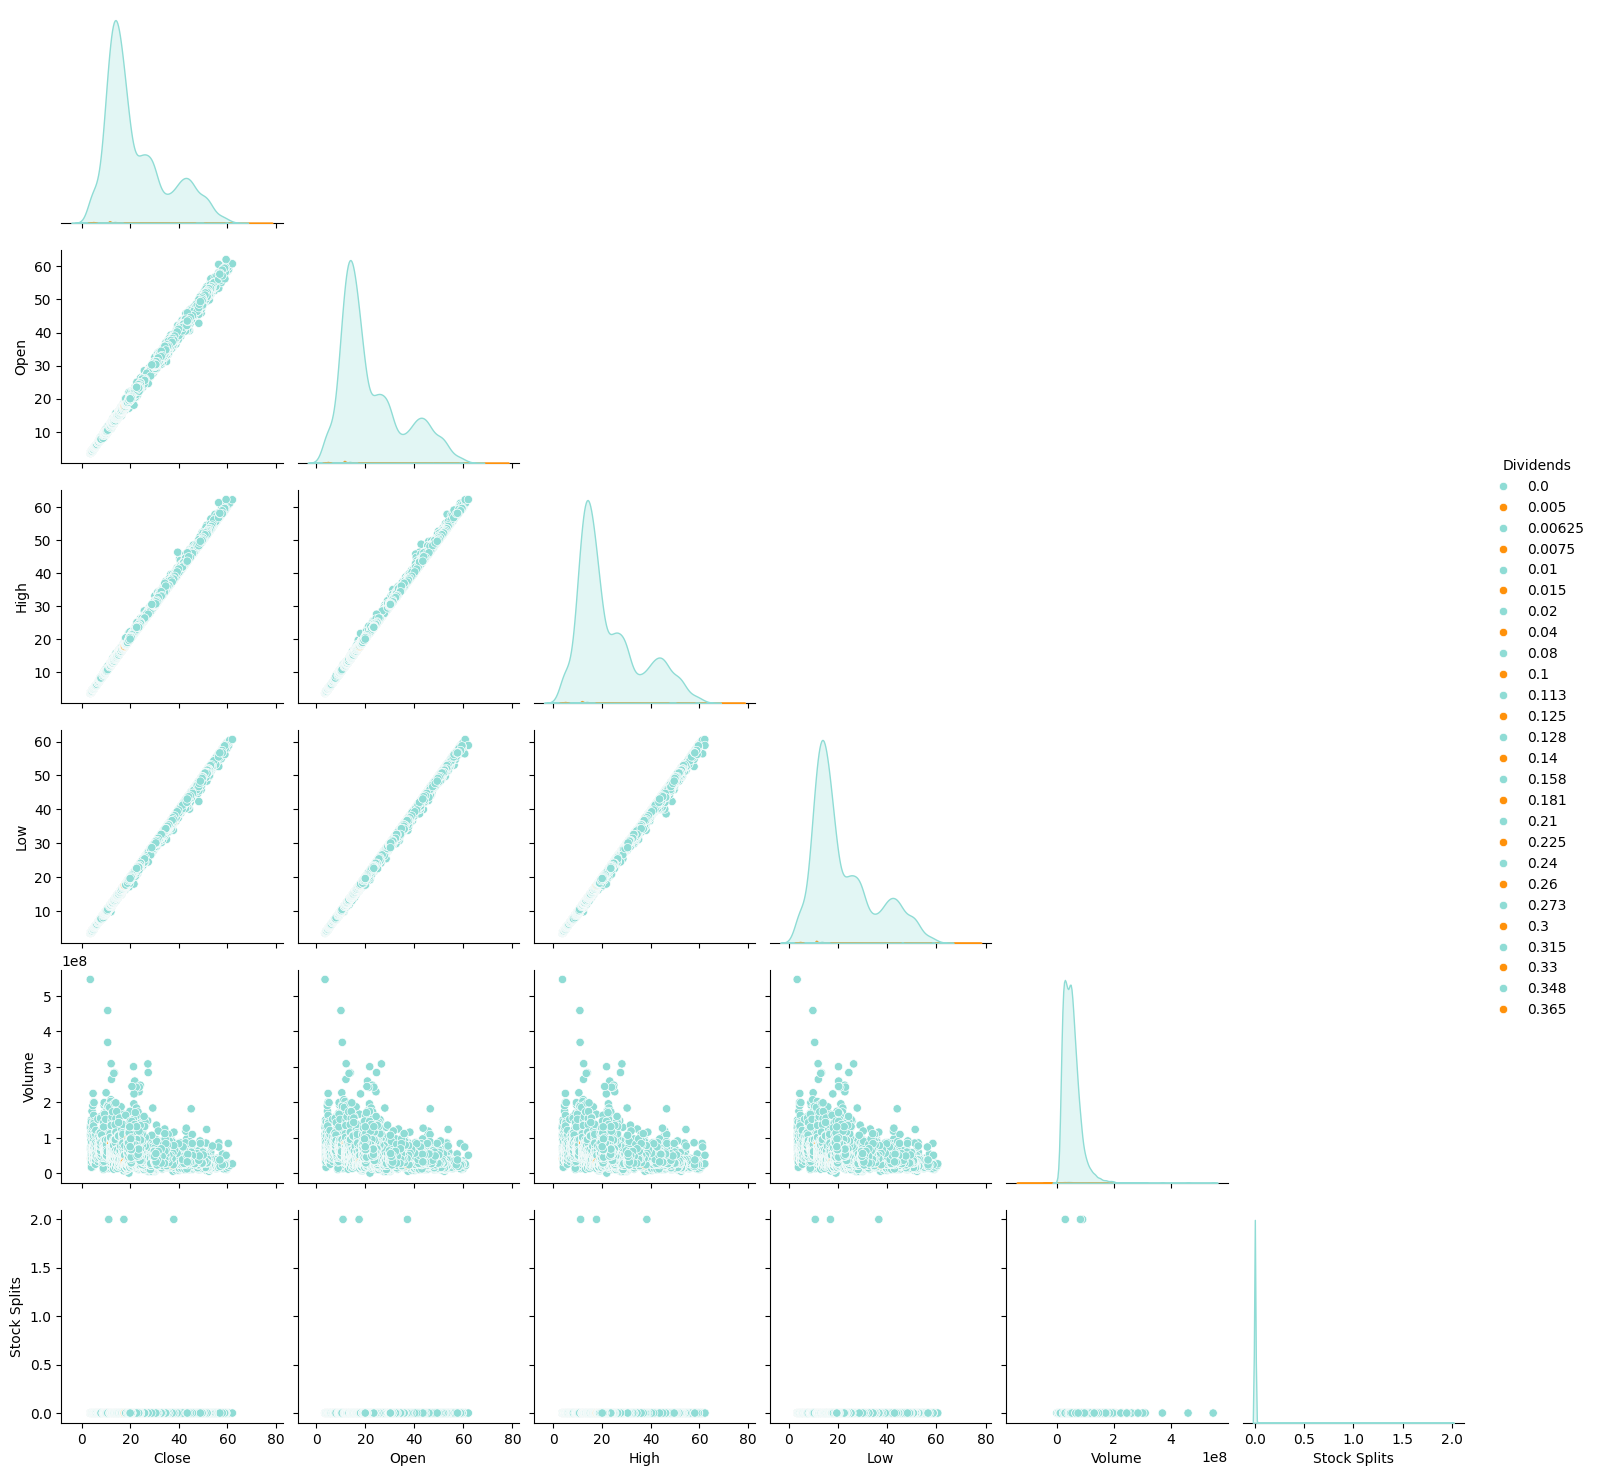

In [14]:
import warnings
warnings.filterwarnings('ignore')
custom_palette = sns.color_palette(["#8FDCD5", "#FF910A"])
sns.pairplot(data=df, diag_kind='kde', hue='Dividends', palette=custom_palette, corner=True)
plt.gcf().set_facecolor('#ffffff')
plt.show()

## Distributions of prices

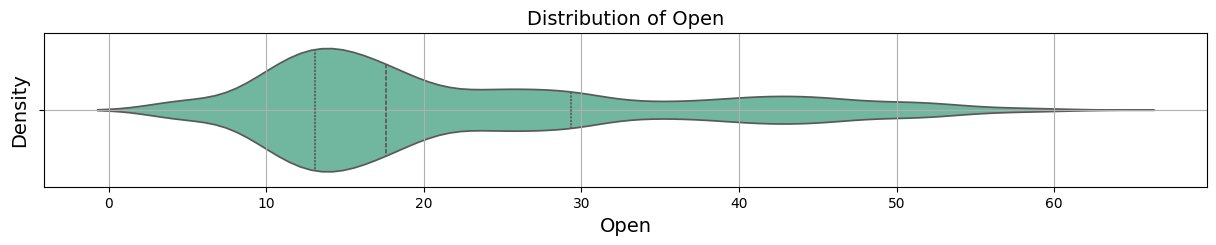

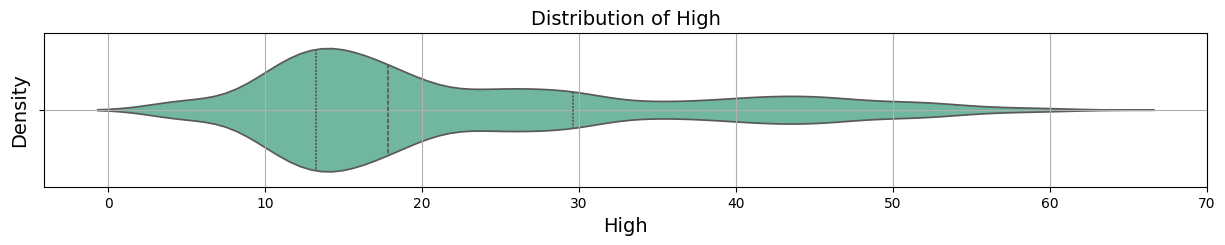

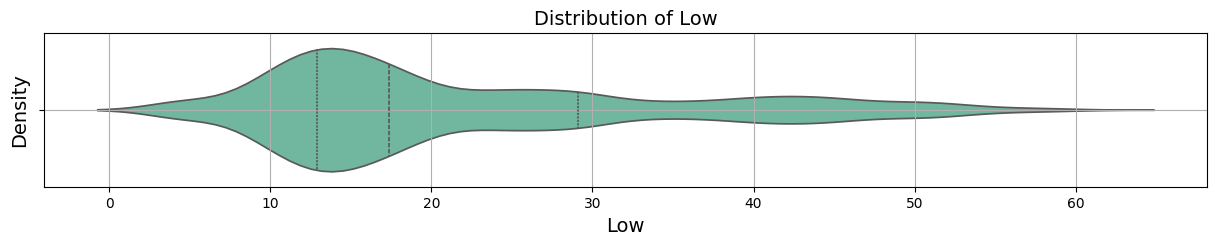

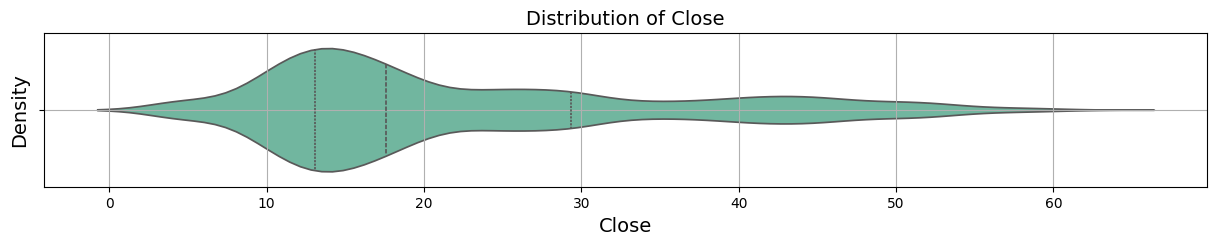

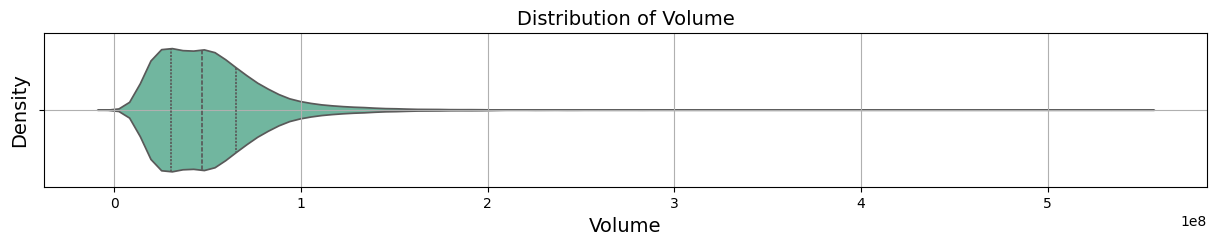

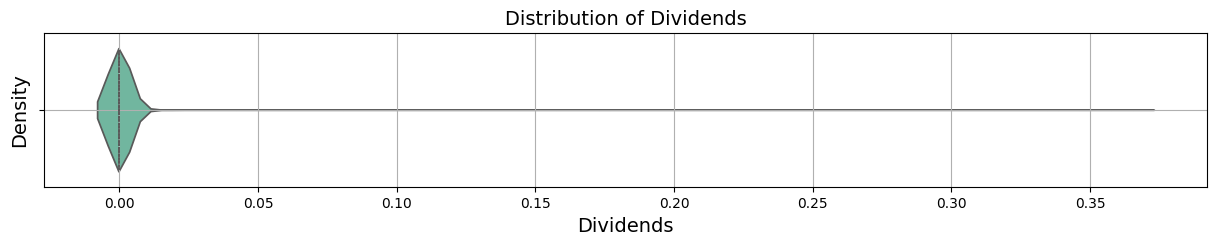

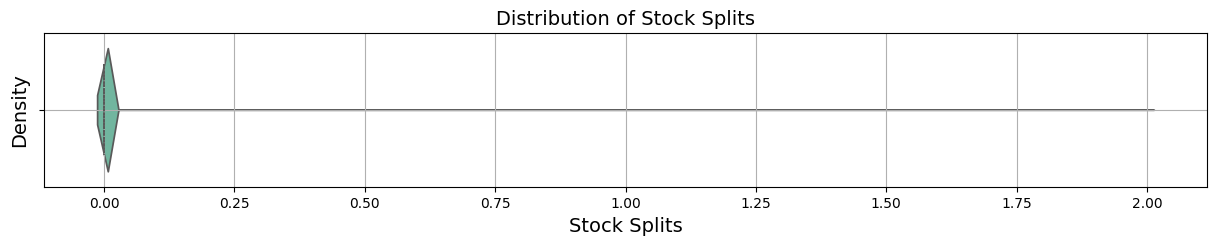

In [15]:
palette = "BuGn"
for column in columns:
    plt.figure(figsize=(15, 2))
    sns.violinplot(x=df[column], palette=palette, inner="quartitle")
    plt.title(f"Distribution of {column}", fontsize = 14)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Density", fontsize=14)
    plt.grid(True)
    plt.show()

## Boxplot Distribution of Prices

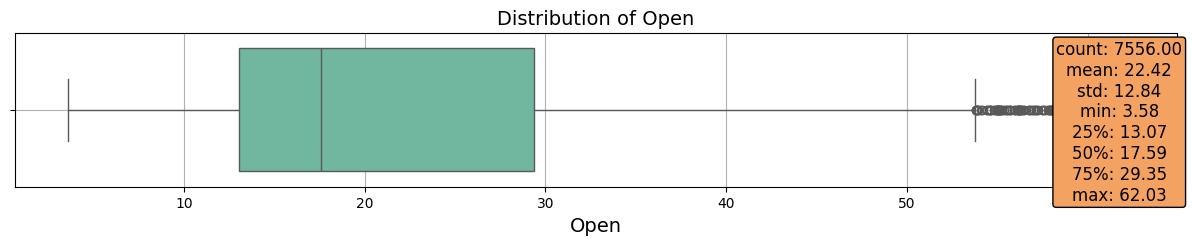

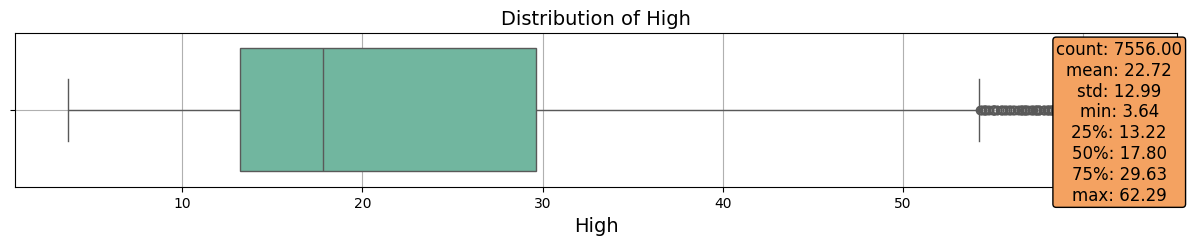

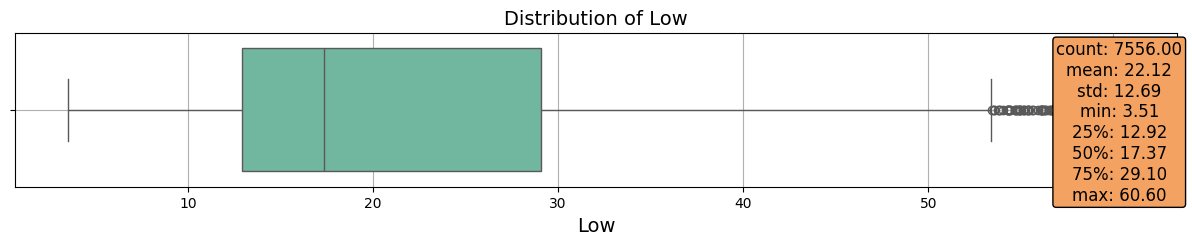

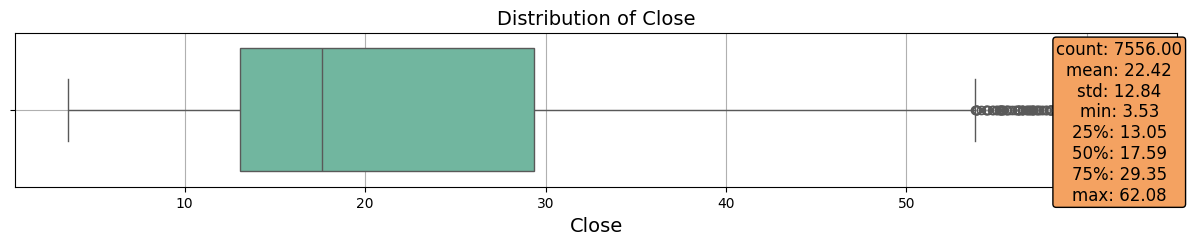

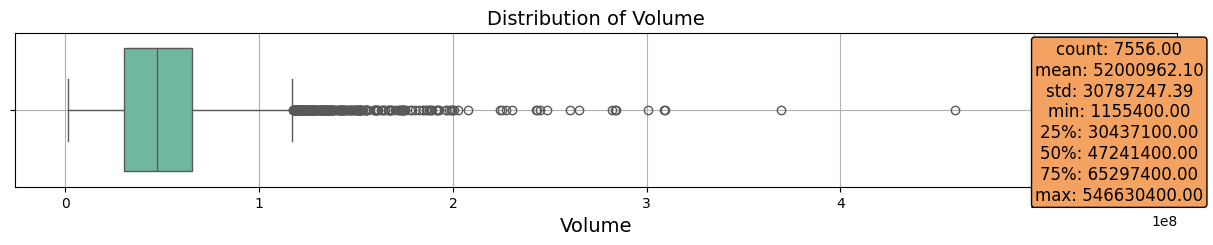

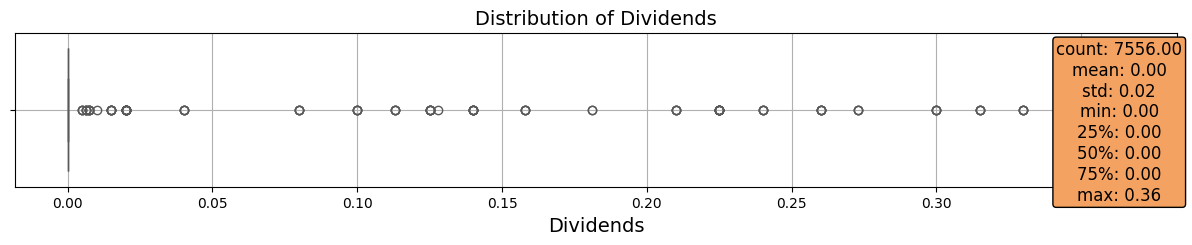

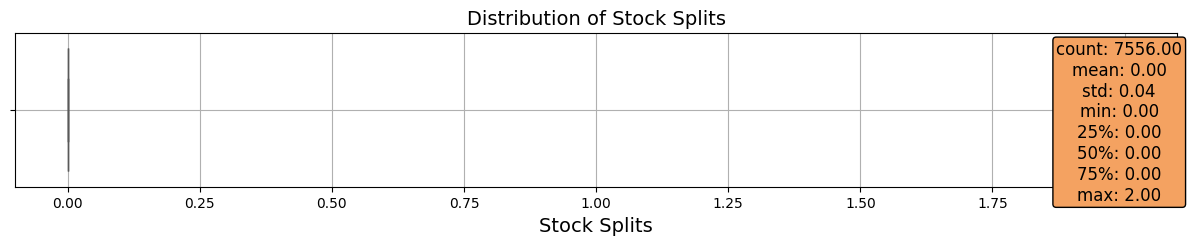

In [16]:
palette = "BuGn"
for column in columns:
    plt.figure(figsize=(15, 2))
    sns.boxplot(x=df[column], palette=palette)
    plt.title(f"Distribution of {column}", fontsize=14)
    plt.xlabel(column, fontsize=14)
    stats = df[column].describe()
    stats_text = "\n".join([f'{key}: {value:.2f}' for key, value in stats.items()])
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, 
             fontsize=12, verticalalignment='top', 
             horizontalalignment='center', bbox=dict(boxstyle='round,pad=0.2', edgecolor='black', facecolor='#f4a261'))
    plt.grid(True)
    plt.show()

## Attributes Stock Prices of Intel from 1995 to 2025

<function matplotlib.pyplot.show(close=None, block=None)>

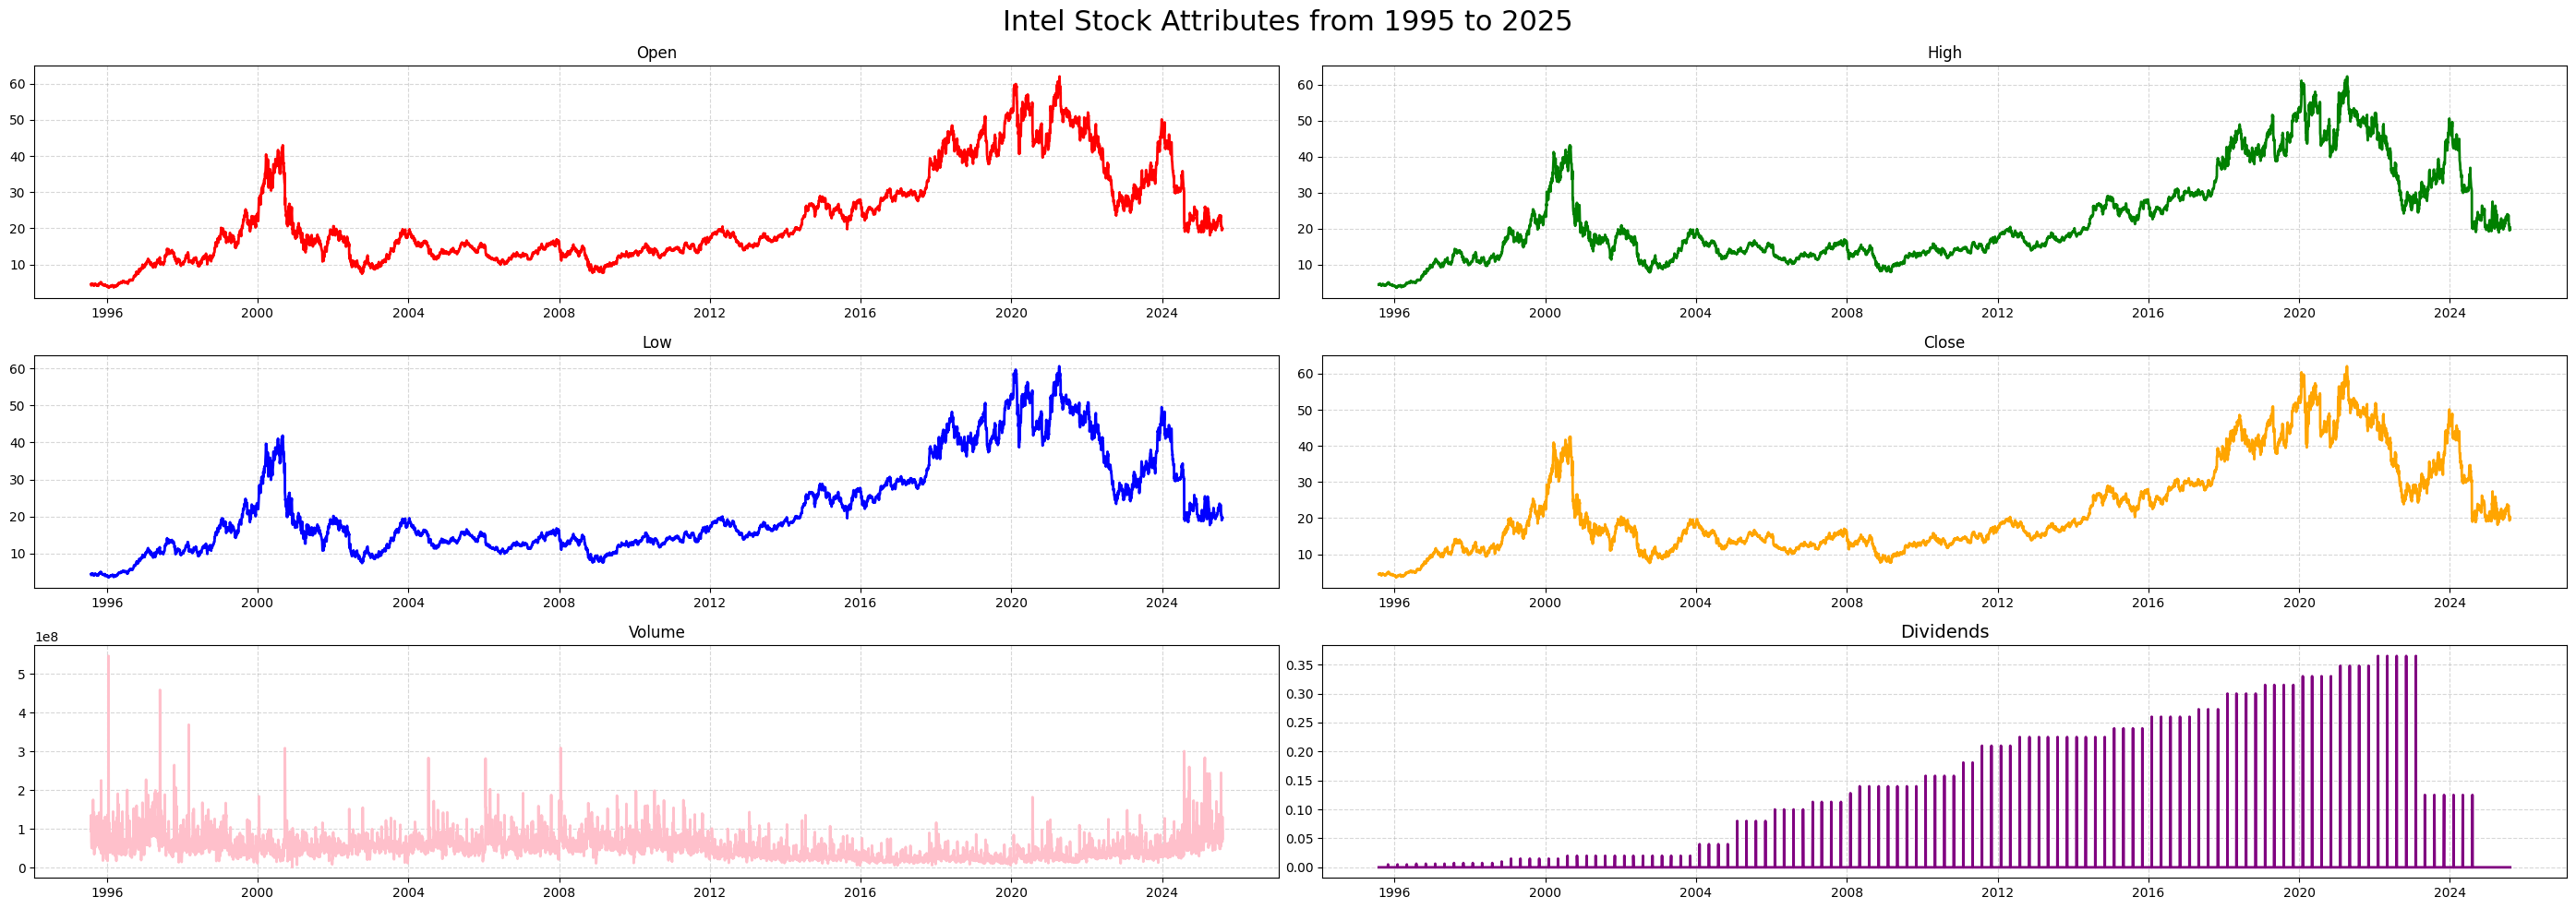

In [17]:
import matplotlib.pyplot as plt
x = df.index
colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']
plt.figure(figsize=(28, 10))
plt.subplot(3, 2, 1)
plt.plot(x, df["Open"], color = colors[0], linewidth=2)
plt.title('Open')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 2)
plt.plot(x, df["High"], color = colors[1], linewidth=2)
plt.title('High')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 3)
plt.plot(x, df["Low"], color = colors[2], linewidth=2)
plt.title('Low')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 4)
plt.plot(x, df["Close"], color = colors[3], linewidth=2)
plt.title('Close')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 5)
plt.plot(x, df["Volume"], color = colors[4], linewidth=2)
plt.title('Volume')
plt.grid(True, linestyle='--', alpha=0.5)
plt.subplot(3, 2, 6)
plt.plot(x, df['Dividends'], color=colors[5], linewidth=2)
plt.title('Dividends', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.suptitle("Intel Stock Attributes from 1995 to 2025", fontsize = 22, y=0.98)
plt.tight_layout()
plt.show


## Weekly Component

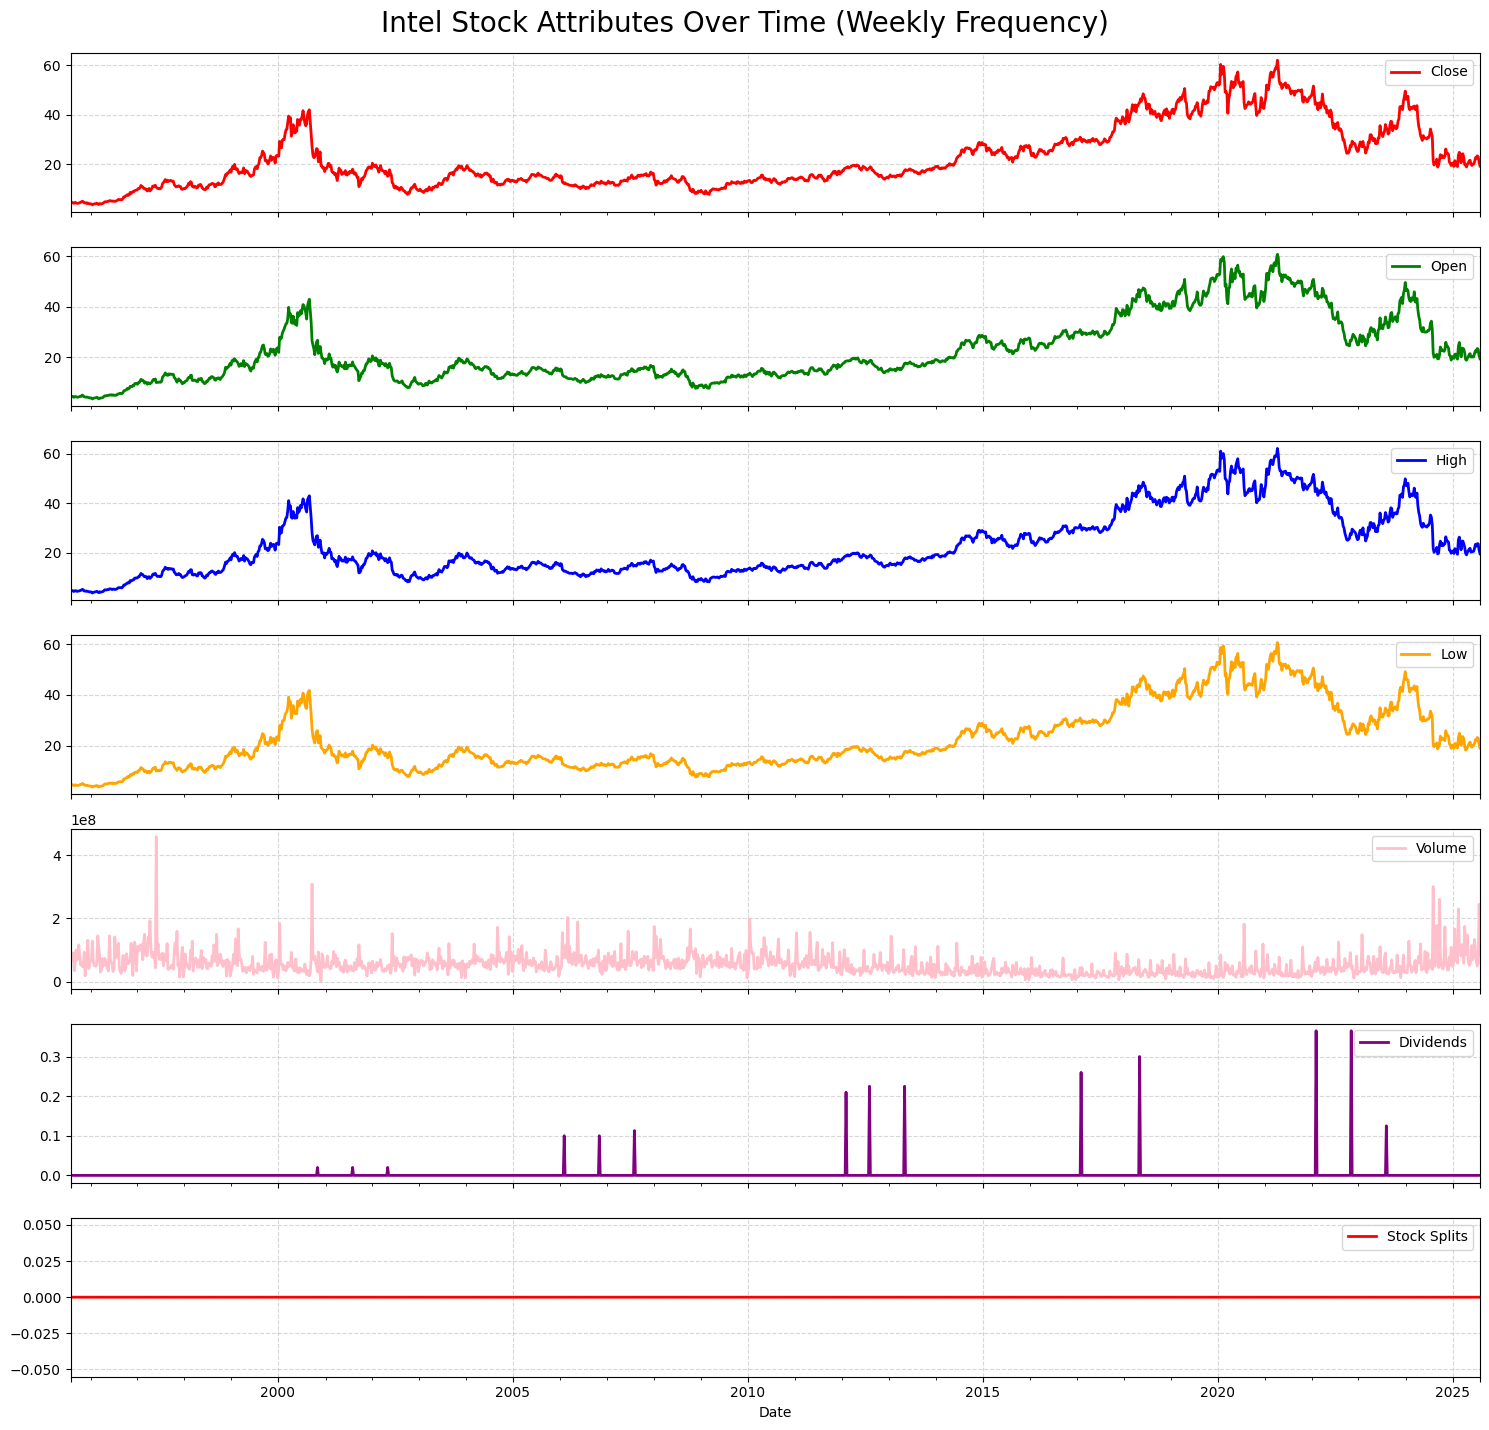

In [18]:
colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']

df_weekly = df.asfreq('W', method='ffill')
df_weekly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle("Intel Stock Attributes Over Time (Weekly Frequency)", fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()   

## Monthly Component

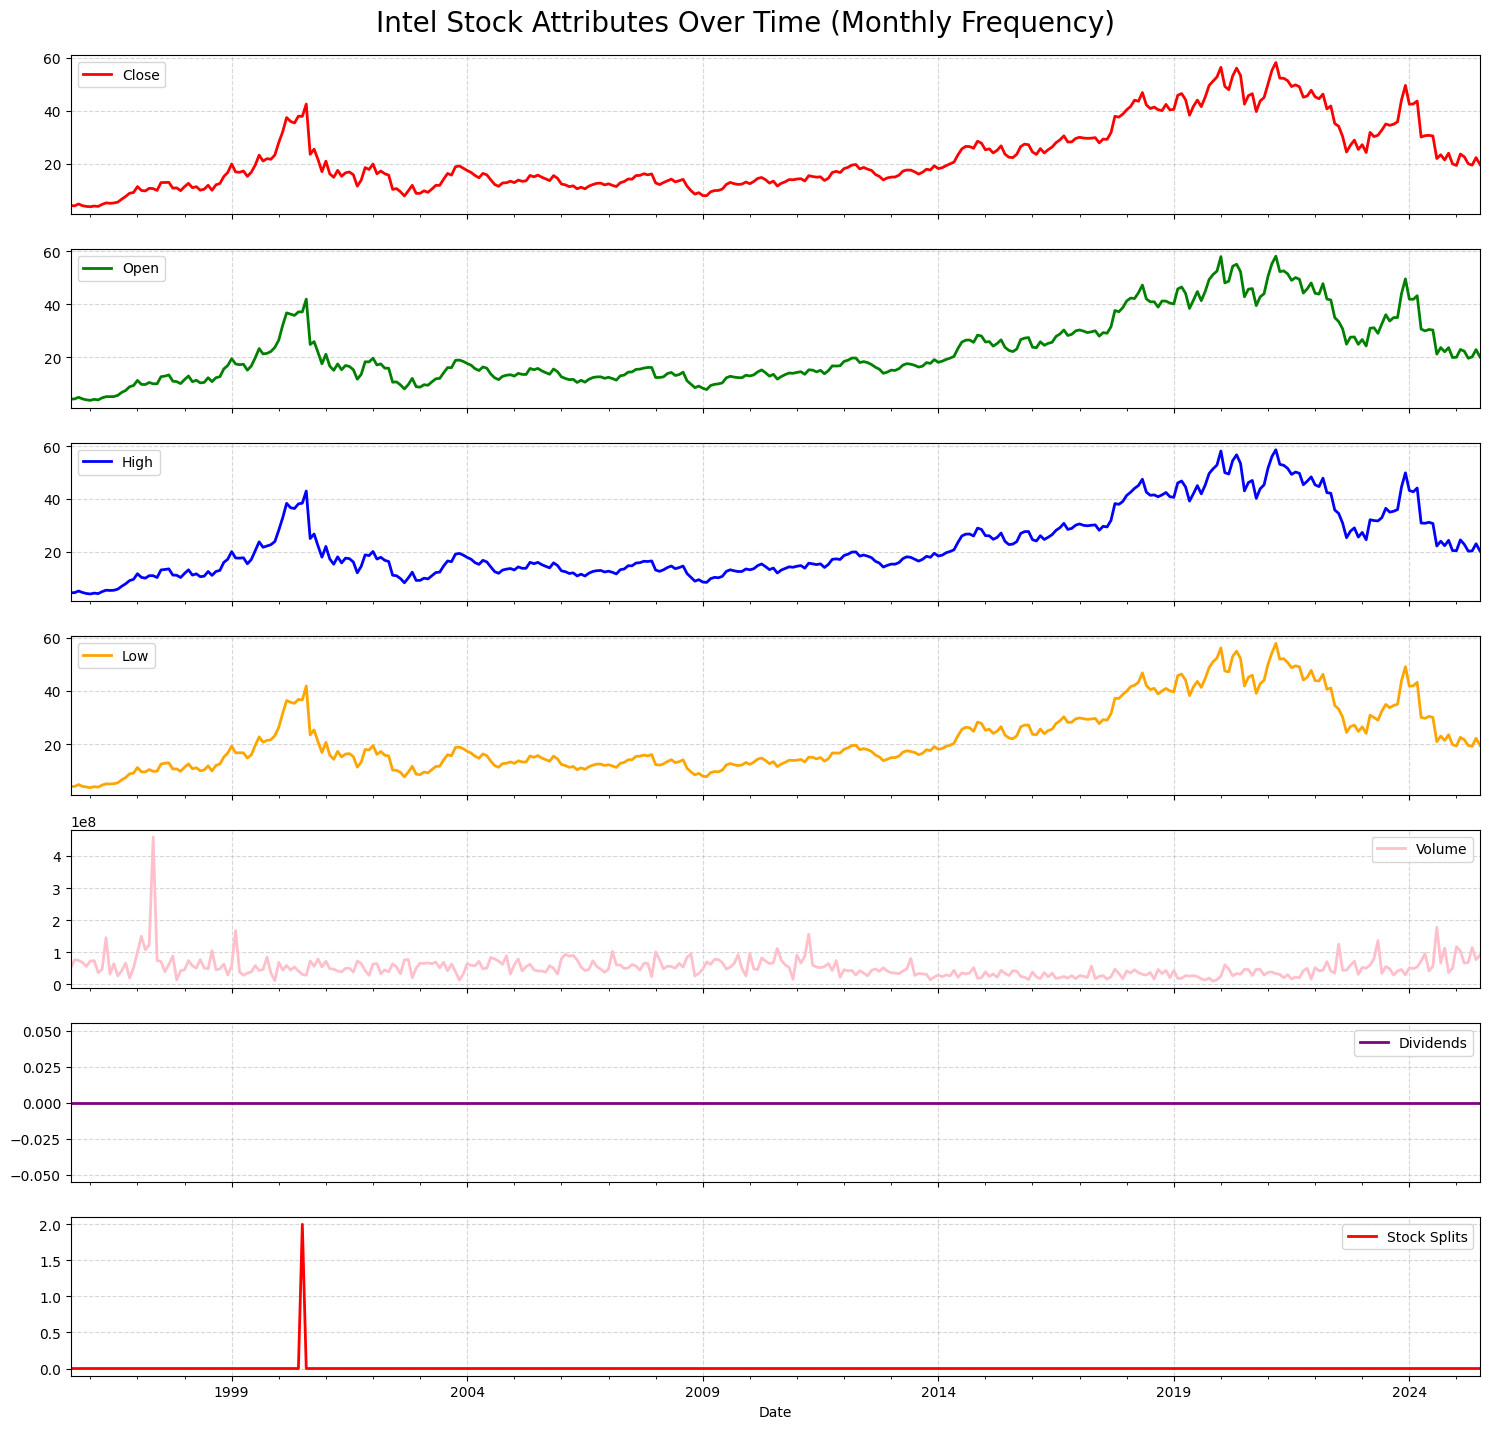

In [19]:
colors = ['red', 'green', 'blue', 'orange', 'pink', 'purple']
df_monthly = df.asfreq("M", method='ffill')
df_monthly.plot(subplots=True, figsize=(15, 15), style='-', color=colors, linewidth=2)
plt.suptitle("Intel Stock Attributes Over Time (Monthly Frequency)", fontsize=20, y=0.95)
for ax in plt.gcf().get_axes():
    ax.grid(True, linestyle = '--', alpha=0.5)
    ax.set_title(ax.get_title(), fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Candlestick Chart of Intel

In [20]:
import plotly.graph_objs as go
from datetime import datetime

candletrace = go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    name = "INTC",
    increasing=dict(line=dict(color="#067c0c"), fillcolor='#ccf5e7'),
    decreasing=dict(line=dict(color="#ff2600"), fillcolor='#fde2dd'),
    hovertext=df.index.strftime('%Y-%m-%d'),
    hoverinfo='x+y+name'
)

layout = go.Layout(
    title=dict(
        text='Candlestick Chart of INTC',
        x=0.5,
        font = dict(size=24, color="#000000", family="Arial Black")
    ),
    xaxis=dict(
        title="Date",
        color='#264653',
        showgrid=True,
        gridcolor = 'lightgray',
        rangeslider=dict(visible=False)
    ),
    yaxis=dict(
        title="Price",
        color='#264653',
        showgrid=True,
        gridcolor='lightgray',
        showline=True,
        rangemode='normal',
    ),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(240, 248, 255, 0.95)',
)

fig = go.Figure(data=[candletrace], layout=layout)

fig.show()

## Yearly Mean Prices

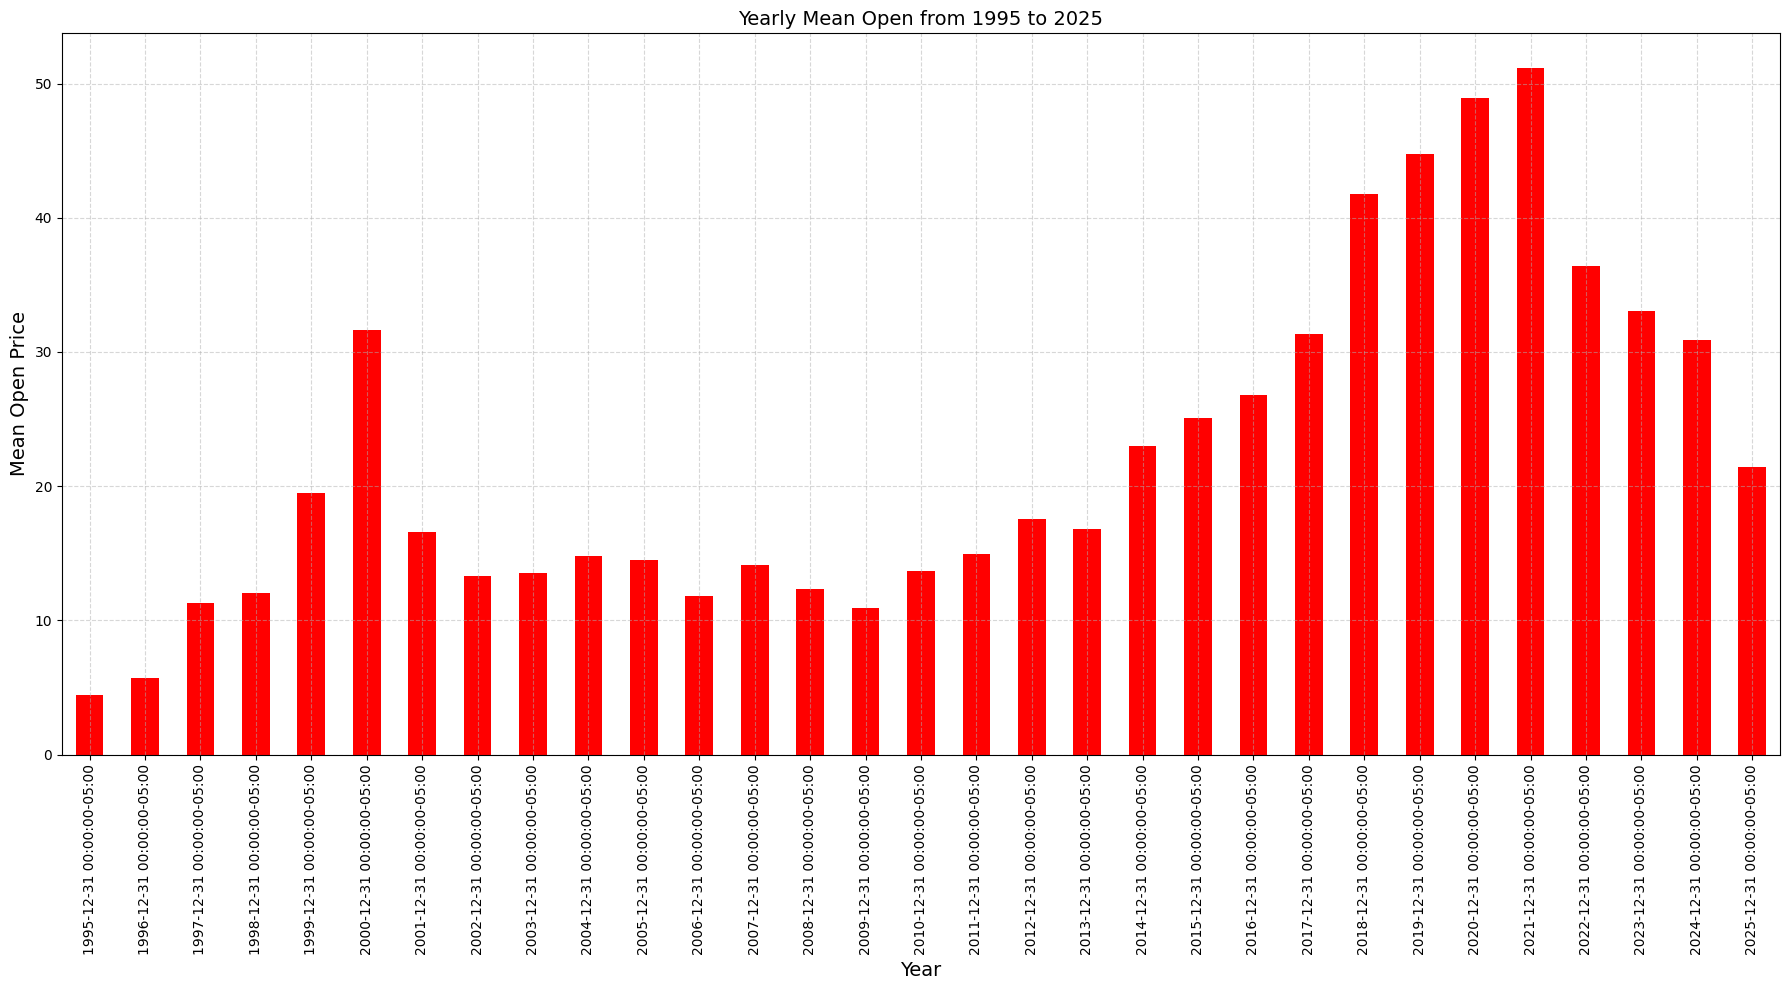

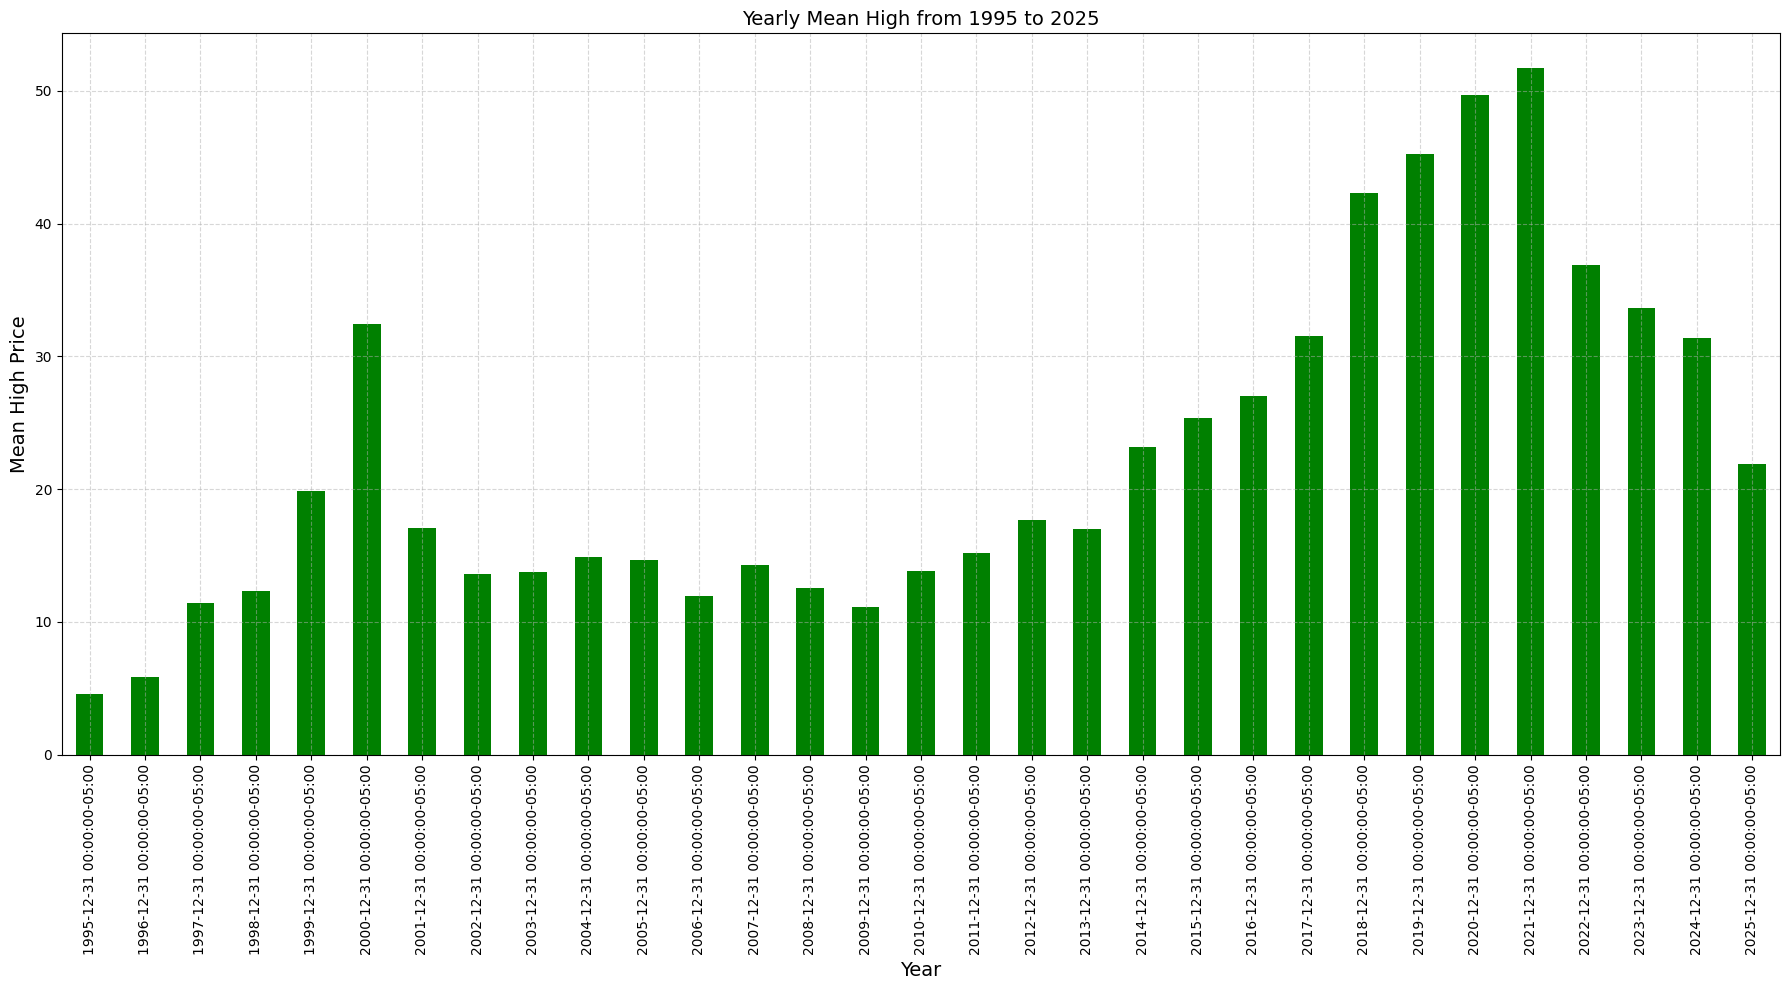

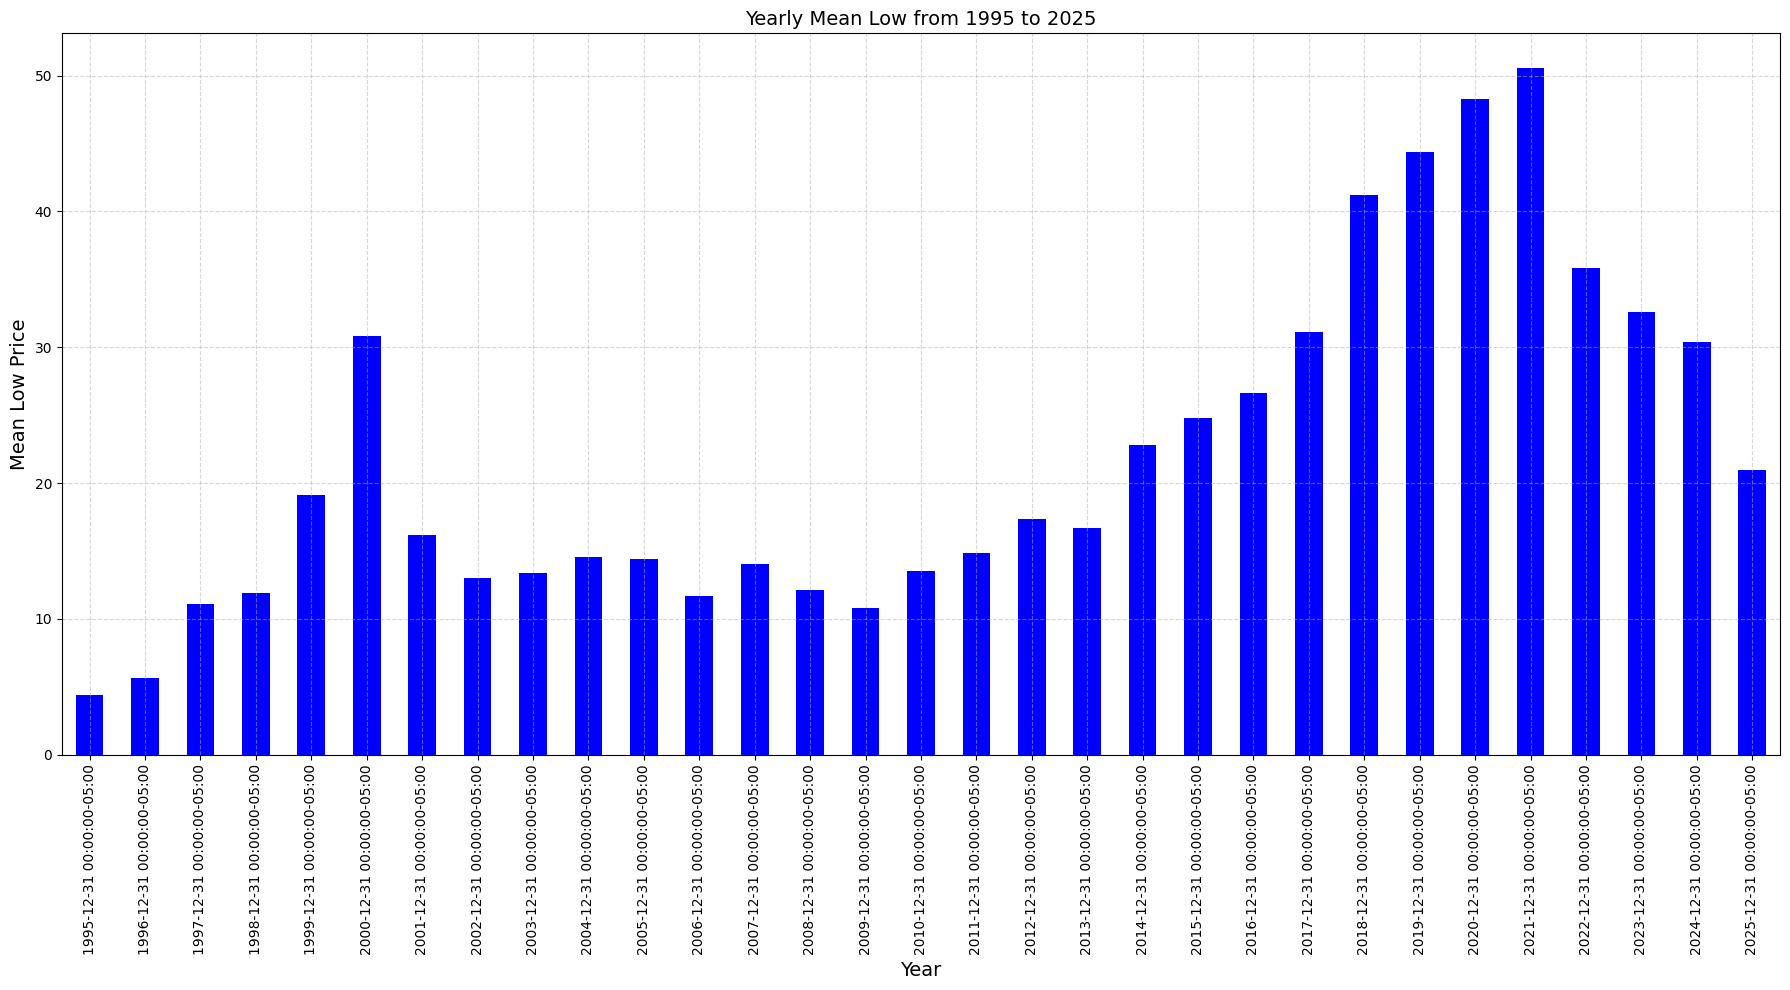

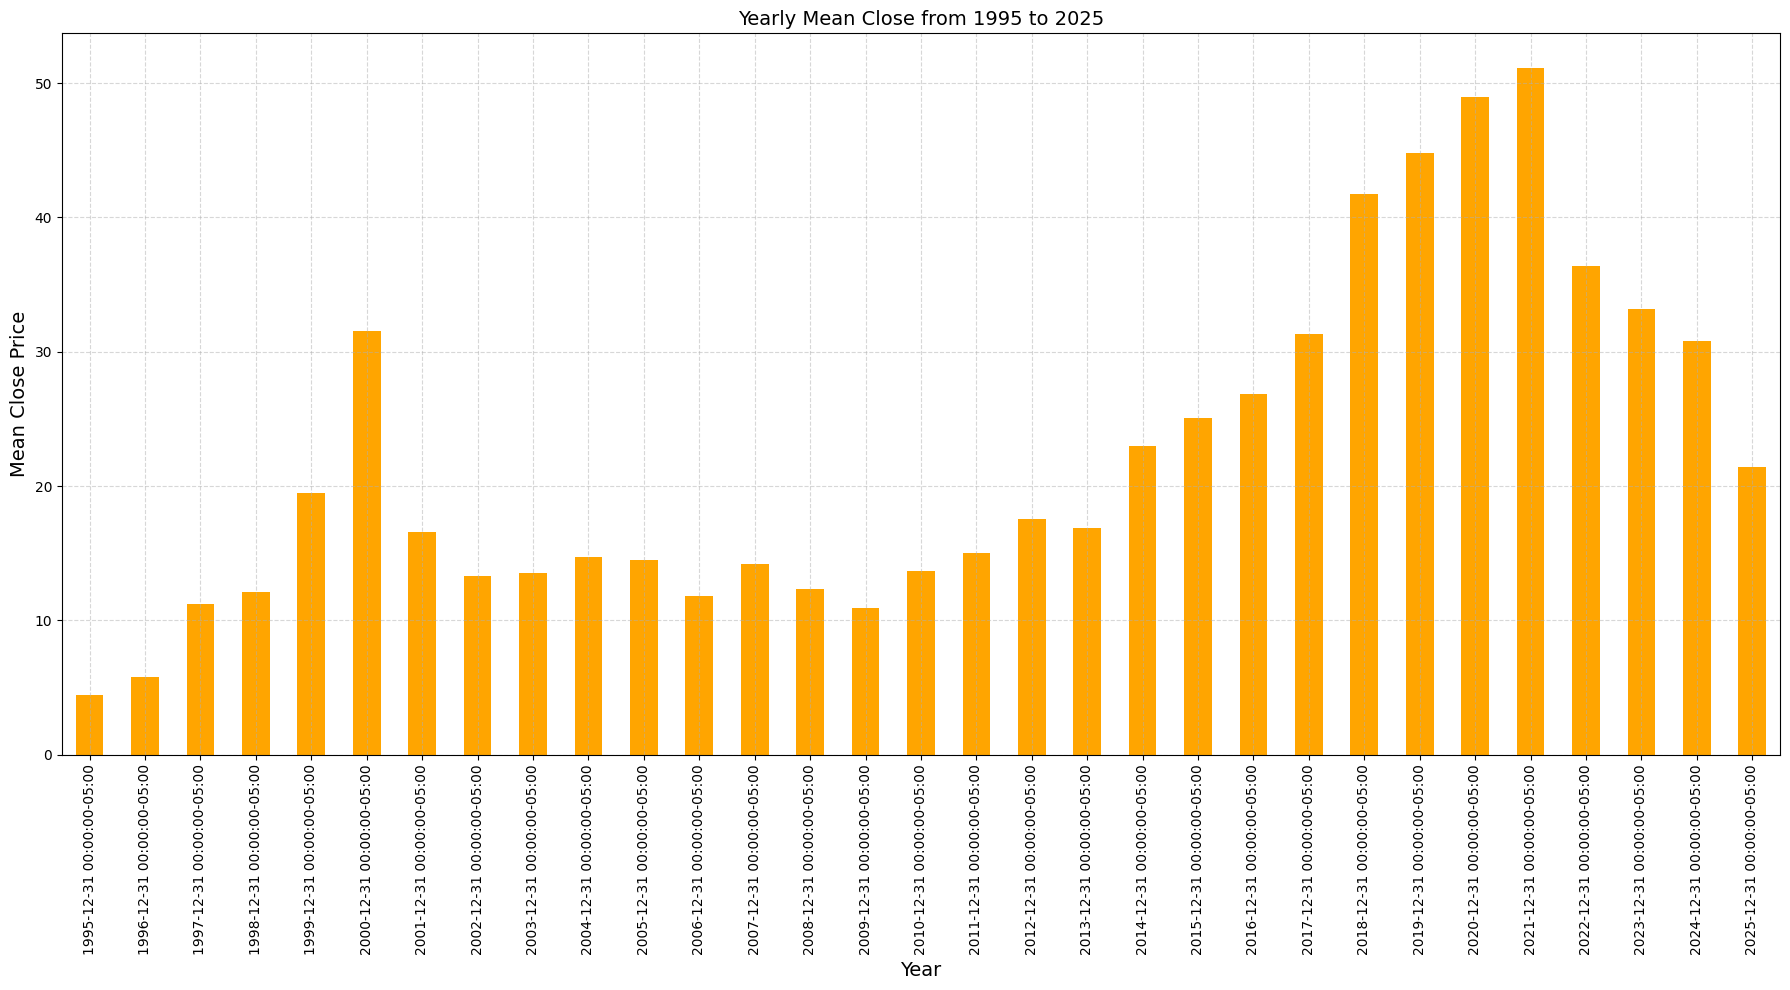

In [21]:
import math
import yfinance as yf
import datetime as dt
colors = ['red', 'green', 'blue', 'orange']
columns = ['Open', 'High', 'Low', 'Close']

for i, col in enumerate(columns):
    plt.figure(figsize=(18, 10))
    df[col].resample("A").mean().plot(kind='bar', color=colors[i])

    plt.title(f'Yearly Mean {col} from {df.index.year.min()} to {df.index.year.max()}', fontsize=14)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel(f'Mean {col} Price', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()




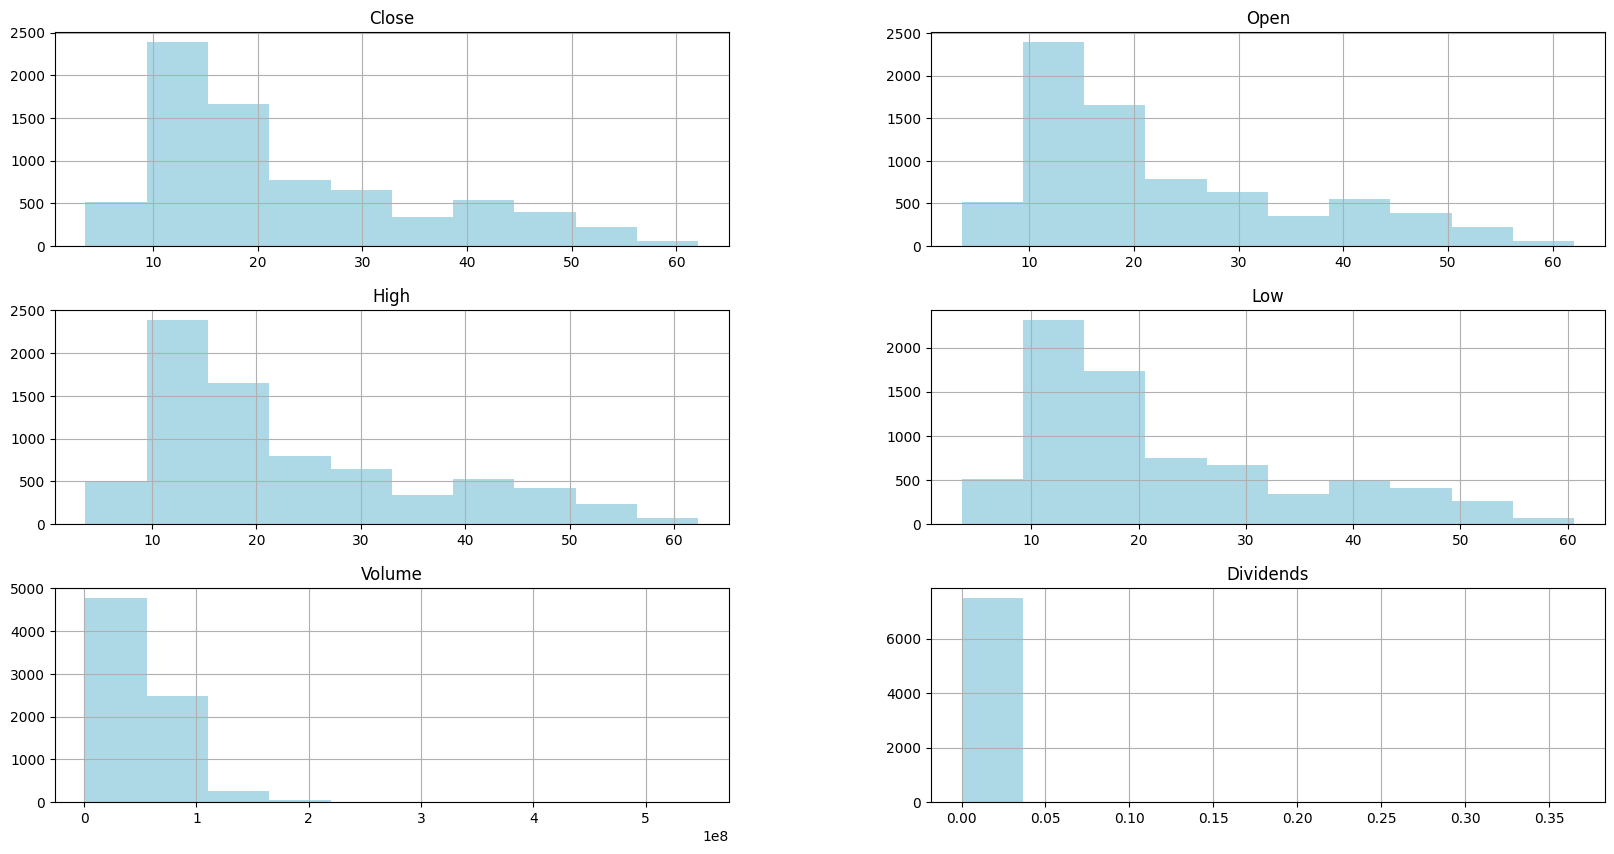

In [22]:
df1 = df.copy()
df1.drop("Stock Splits", axis=1, inplace=True)
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
hist = df1.hist(ax=ax, color = "lightblue")

## SMA (Simple Moving Average)

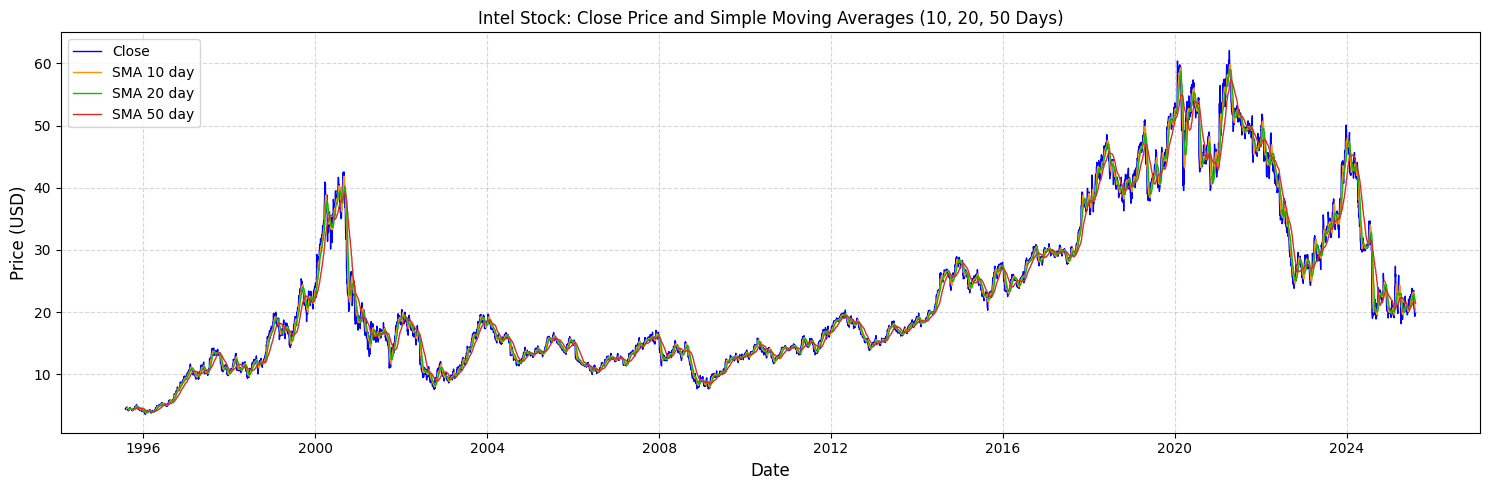

In [23]:
md = [10, 20, 50]
colors = ["#ff9500", "#12b900", "#DF2A2A"]

for i, SMA in enumerate(md):
    col = f'SMA {SMA} day'
    df[col] = df['Close'].rolling(SMA).mean()

plot_cols = ['Close'] + [f'SMA {SMA} day' for SMA in md]
plot_colors = ['blue'] + colors

plt.figure(figsize=(15, 5))
for i, col in enumerate(plot_cols):
    plt.plot(df.index, df[col], label=col, color=plot_colors[i], linewidth=1)

plt.title("Intel Stock: Close Price and Simple Moving Averages (10, 20, 50 Days)")
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

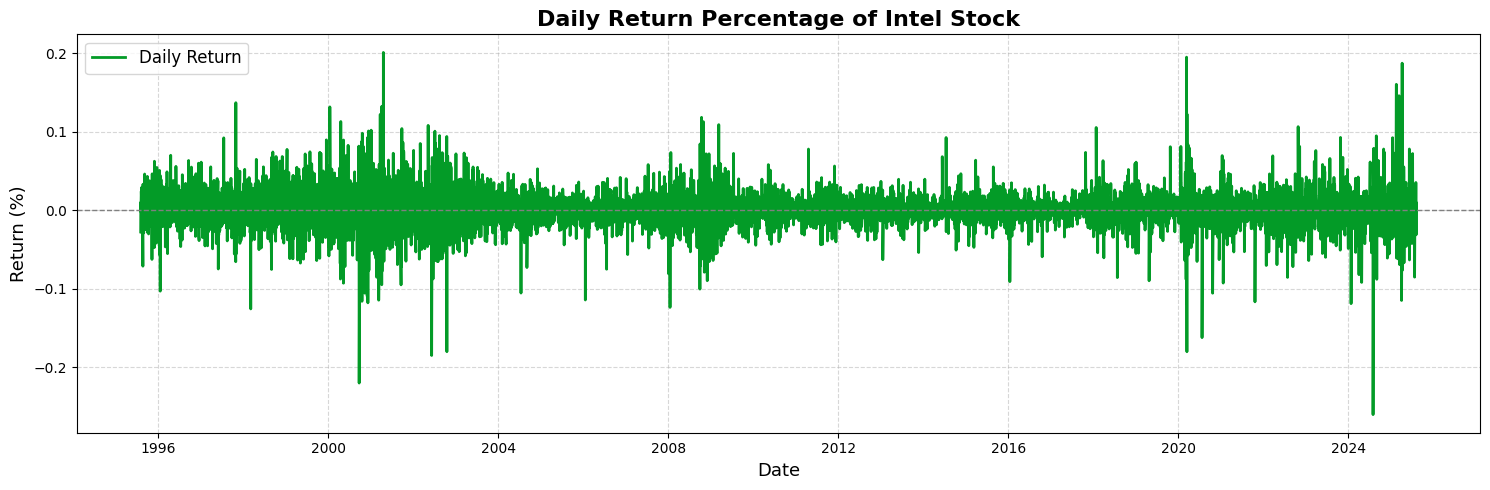

In [24]:
import matplotlib.pyplot as plt

# Tính phần trăm giá trị lợi nhuận mỗi ngày so với ngày trước đó
df['Daily_Return']=df['Close'].pct_change()

plt.figure(figsize=(15, 5))
plt.plot(df.index, df["Daily_Return"], color="#039b27", linewidth=2, label="Daily Return")

# df['Daily_Return_SMA10'] = df['Daily_Return'].rolling(window=10).mean()
# plt.plot(df.index, df["Daily_Return_SMA10"], color="#b3b61d", linewidth=2, linestyle='--', label='10 Day SMA')

# df['Daily_Return_SMA20'] = df['Daily_Return'].rolling(window=20).mean()
# plt.plot(df.index, df["Daily_Return_SMA20"], color='#e76f51', linewidth=2, linestyle='--', label='20 Day SMA')

plt.axhline(0, color="gray", linewidth=1, linestyle='--')

plt.title('Daily Return Percentage of Intel Stock', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=13)
plt.ylabel('Return (%)', fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
from IPython.display import Image
from keras.utils import plot_model
from keras.models import Sequential
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import os


2025-08-13 00:01:09.853062: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-13 00:01:10.232992: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
df2 = df.copy(deep=True)

columns = ['Open', 'High', 'Low', 'Close', 'Volume']

scalers = {}

for col in columns:
    scaler = MinMaxScaler(feature_range=(-1, 1))
    df2[col] = scaler.fit_transform(df2[col].values.reshape(-1, 1))
    scalers[col] = scaler


selected_columns = ['Open', 'High', 'Low', 'Volume', 'Close']
df_array = df2[selected_columns].values

print('Shape of scaled data: ',df_array.shape)

Shape of scaled data:  (7556, 5)


# Modeling (Tensorflow)

## RNN (Recurrent Neural Networks)

In [27]:
# Preparing Data for Time Series
seq_len = 11 #Lấy độ dài mỗi chuỗi
sequences = [] #Luu các chuỗi vào danh sách

for i in range(len(df_array)-seq_len + 1):
    seq = df_array[i : i + seq_len]
    sequences.append(seq)

sequences = np.array(sequences)
print("Shape of Sequences: ", sequences.shape)

Shape of Sequences:  (7546, 11, 5)


### Splitting the dataset

In [28]:
def split_data(sequence):
    train_data, test_data = train_test_split(sequence, test_size=0.2, shuffle=False)
    val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=False)
    return train_data, val_data, test_data

In [29]:
train_data, test_data, val_data = split_data(sequences)
print("Train Data:", train_data.shape, "Validation Data:", val_data.shape, "Test Data:", test_data.shape)

Train Data: (6036, 11, 5) Validation Data: (755, 11, 5) Test Data: (755, 11, 5)


In [30]:
X_train = train_data[:, :-1, :]
y_train = train_data[:, -1, -1]

X_test = test_data[:, :-1, :]
y_test = test_data[:, -1, -1]

X_valid = val_data[:, :-1, :]
y_valid = val_data[:, -1, -1]

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"X_valid: {X_valid.shape}, y_valid: {y_valid.shape}")

X_train: (6036, 10, 5), y_train: (6036,)
X_test: (755, 10, 5), y_test: (755,)
X_valid: (755, 10, 5), y_valid: (755,)


### Defining Model 
Using Long Short-term Memory (LSTM) to capture sequential infomation. Using Functional API in class

In [31]:
class LSTMRegressor(Model):
    def __init__(self, input_shape, units1=64, units2=32, Dense_units = 64):
        inputs = Input(shape=input_shape, name='Input')

        x = Bidirectional(LSTM(units1, return_sequences=True, kernel_regularizer=l2(1e-5)), name="BiLSTM_1")(inputs)
        x = Dropout(0.1, name='Dropout_1')(x)
        x = LSTM(units2, return_sequences=False, kernel_regularizer=l2(0.0001), name="LSTM_2")(x)
        x = BatchNormalization(name="BatchNorm")(x)
        x = Dropout(0.2, name='Dropout_2')(x)
        x = Dense(Dense_units, activation='relu', kernel_regularizer=l2(0.0001), name="Dense_1")(x)
        x = Dense(8, activation='relu', name="Dense_2")(x)
        outputs = Dense(1, name="output")(x)

        self.model = Model(inputs=inputs, outputs=outputs, name="LSTMRegressor")

    def compile(self, *args, **kwargs):
        self.model.compile(*args, **kwargs)

    def fit(self, *args, **kwargs):
        return self.model.fit(*args, **kwargs)
    
    def predict(self, *args, **kwargs):
        return self.model.predict(*args, **kwargs)
    
    def evaluate(self, *args, **kwargs):
        return self.model.evaluate(*args, **kwargs)
    
    def summary(self):
        return self.model.summary()
    
    def plot_model_architecture(self, filename="model_architecture.png"):
        os.makedirs('Chart', exist_ok=True)
        file_path = os.path.join('Chart', filename)
        plot_model(self.model, to_file=file_path, show_shapes=True)


input_shape = (X_train.shape[1], X_train.shape[2])
model = LSTMRegressor(input_shape)

optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stoping = EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True
)


history = model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size = 64,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stoping]
)


2025-08-13 00:01:13.457740: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-13 00:01:13.522268: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-13 00:01:13.522345: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-13 00:01:13.524739: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-08-13 00:01:13.524793: I external/local_xla/xla/stream_executor

Epoch 1/50


2025-08-13 00:01:24.325566: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


95/95 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - loss: 0.1768 - val_loss: 0.0756
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0752 - val_loss: 0.0698
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0565 - val_loss: 0.0685
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0470 - val_loss: 0.0612
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0400 - val_loss: 0.0457
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0378 - val_loss: 0.0344
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0352 - val_loss: 0.0266
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0326 - val_loss: 0.0221
Epoch 9/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0325 - val_loss: 0.0213
Epoch 10/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0290 - val_loss: 0.0207
Epoch 11/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0285 - val_loss: 0.0246
Epoch 12/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0265 - val_

In [32]:
y_pred = model.predict(X_test)

test_loss = model.evaluate(X_test, y_test)
print("Test Loss:",test_loss)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119
Test Loss: 0.011461429297924042


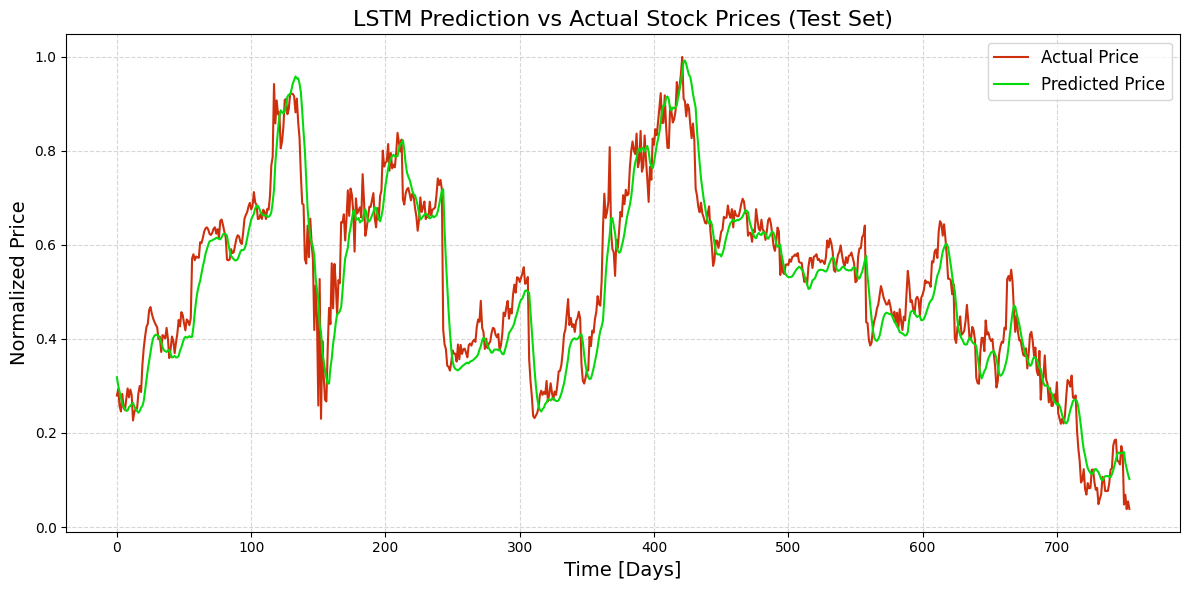

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, color="#ce300d", label = "Actual Price")

plt.plot(y_pred, color = "#05d90c", label = "Predicted Price")

plt.title("LSTM Prediction vs Actual Stock Prices (Test Set)", fontsize=16)
plt.xlabel('Time [Days]', fontsize=14)
plt.ylabel('Normalized Price', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

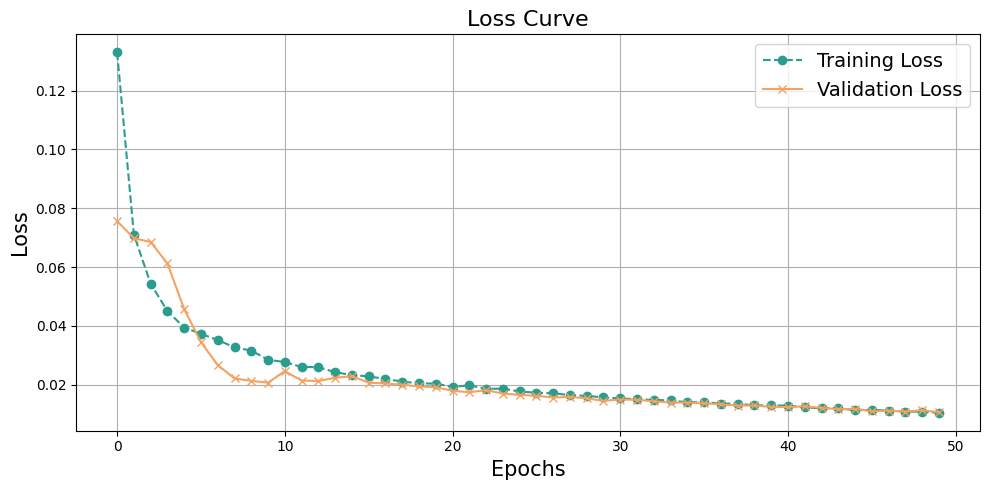

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='#2a9d8f', marker='o', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#f4a261', marker='x', linestyle='-')

plt.title("Loss Curve", fontsize=16)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend(fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
print("Model Summary")
model.summary()

Model Summary


Model: "LSTMRegressor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 10, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BiLSTM_1 (Bidirectional)        │ (None, 10, 128)        │        35,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm (BatchNormalization)  │ (None, 32)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,525 (693.46 KB)

 Trainable params: 59,153 (231.07 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 118,308 (462.14 KB)

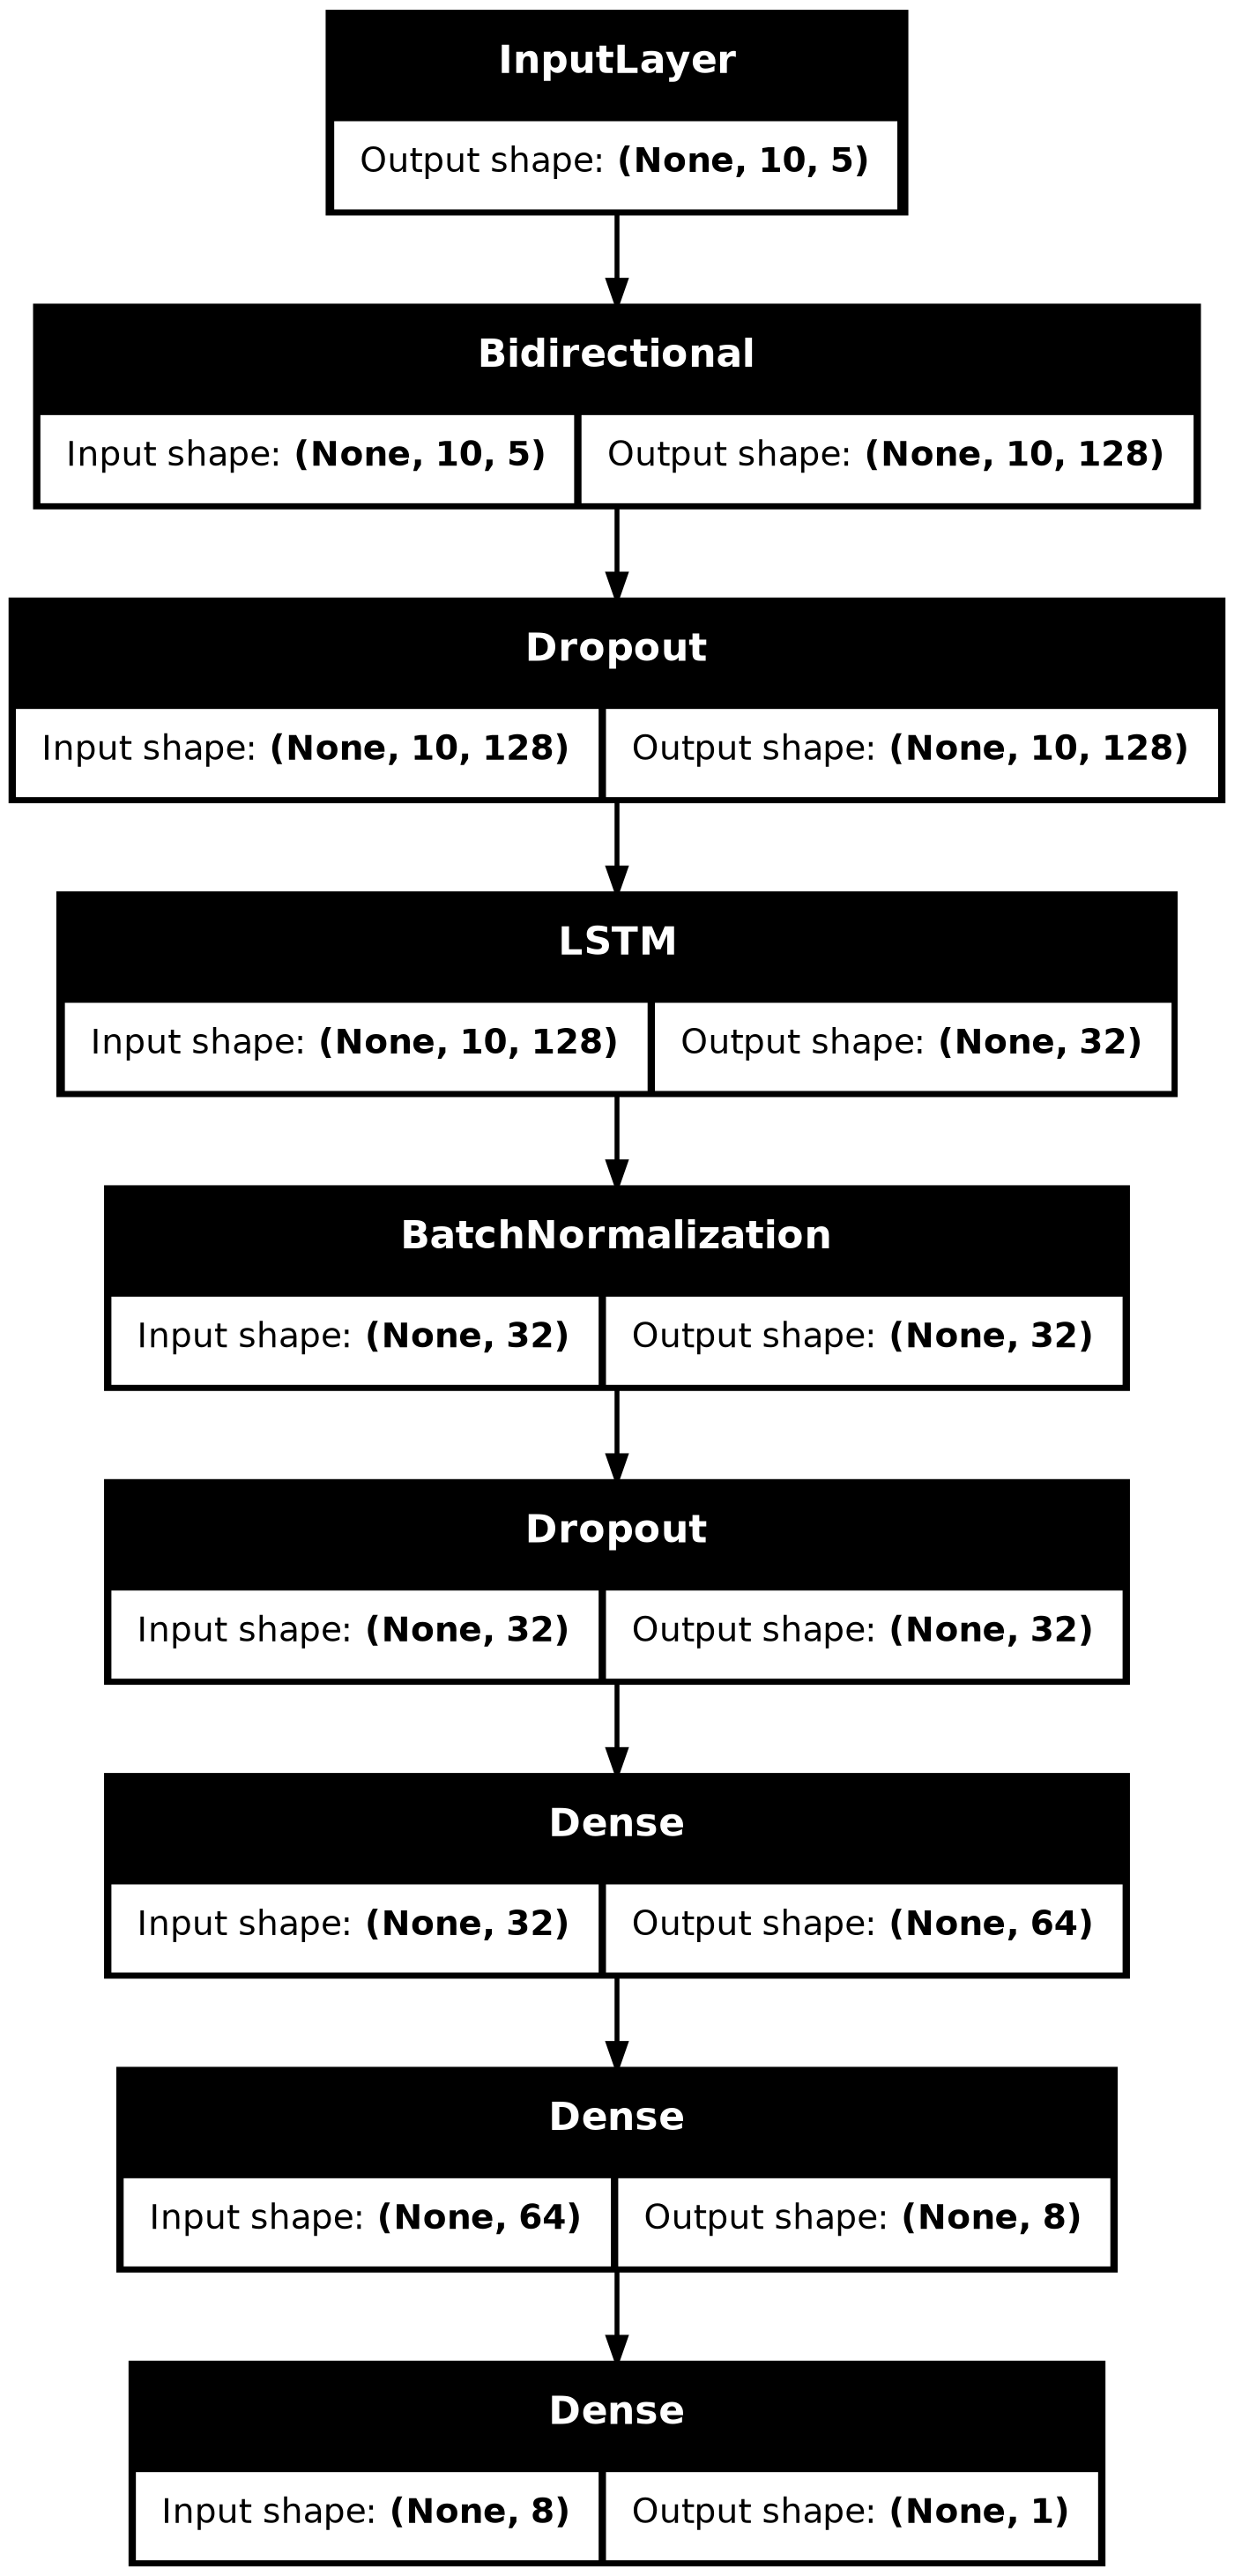

In [36]:
model.plot_model_architecture()
Image(filename="Chart/model_architecture.png")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


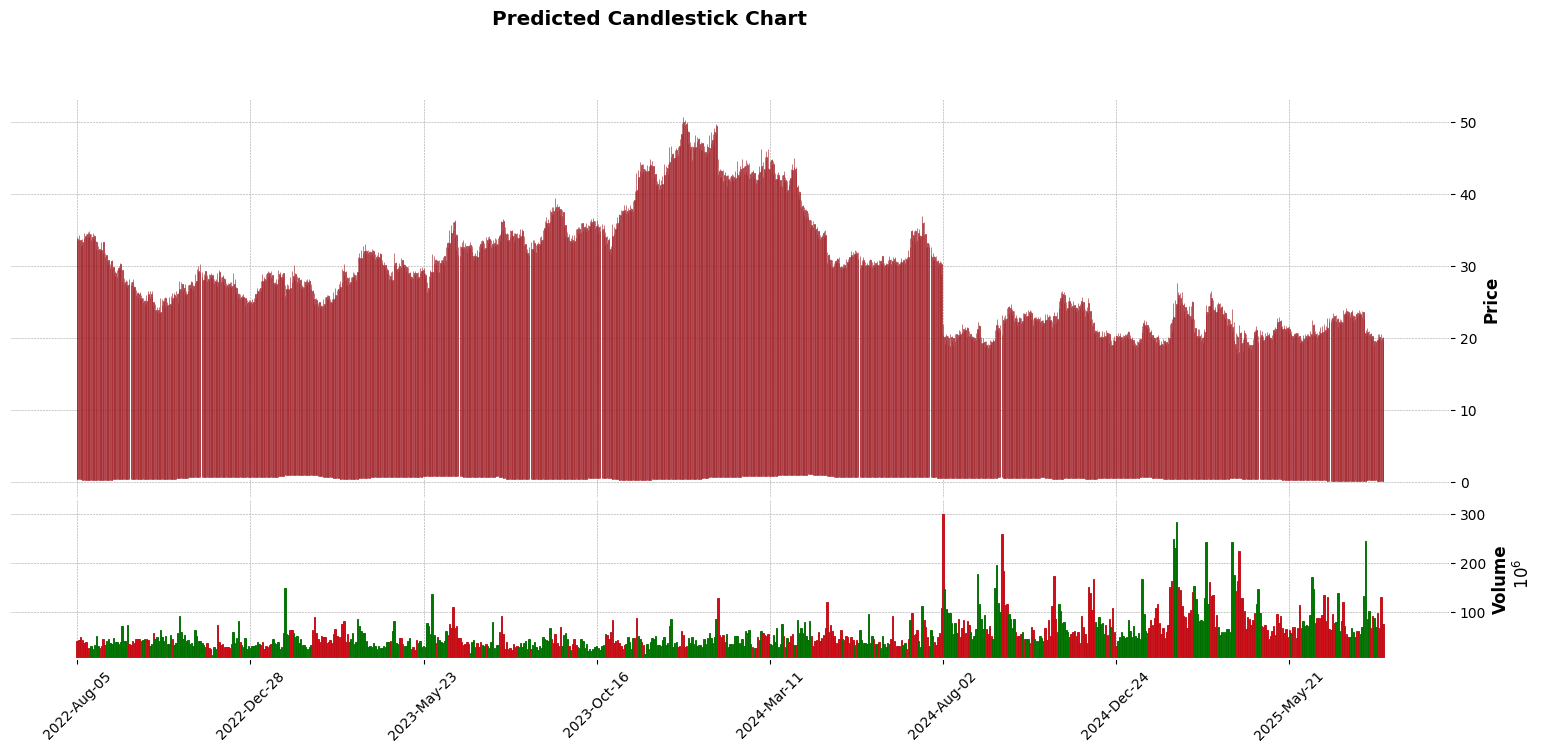

In [37]:
import mplfinance as mpf
predicted_prices = model.predict(X_test)
predicted_df = df.iloc[-len(predicted_prices):].copy()
predicted_df['Predicted Close'] = predicted_prices
predicted_df['Open'] = predicted_df['Open']
predicted_df['High'] = predicted_df['High']
predicted_df['Low'] = predicted_df['Low']
predicted_df['Close'] = predicted_df['Predicted Close']
final_df = predicted_df[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
final_df.index = pd.to_datetime(predicted_df.index)

mpf.plot(
    final_df,
    type='candle',
    volume=True,
    style='charles',
    title='Predicted Candlestick Chart',
    ylabel='Price',
    ylabel_lower='Volume',
    figsize=(20, 8)
)

In [38]:
df = df.reset_index()

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
final_df = df[['Open', 'High', 'Low', 'Close']]

candlestick_trace = go.Candlestick(
    x = final_df.index,
    open=final_df['Open'],
    high=final_df['High'],
    low=final_df['Low'],
    close=final_df['Close'],
    name='Candlestick',
    increasing_line_color="#0c9115",
    decreasing_line_color="#ff0000"
)

fig = go.Figure(data=[candlestick_trace])

fig.update_layout(
    title="Predicted Candlestick Chart",
    xaxis_title="Days",
    yaxis_title="Prices",
    template="plotly_white",
    height=600,
    width=1500,
    xaxis_rangeslider_visible=False,
    hovermode='x unified',
    font=dict(family="Arial Black", size=14, color="#000000"),
    margin=dict(l=60, r=30, t=60, b=60),
    plot_bgcolor='rgba(255, 255, 255, 0.95)'
)

fig.update_xaxes(
    tickformat='%d-%m-%Y',
    showgrid=True,
    gridcolor='lightgray',
    ticks='outside'
)

fig.update_yaxes(
    showgrid=True,
    gridcolor='lightgray',
    ticks='outside'
)

fig.show()

### Predicting the next 10 days

In [40]:
latest_prediction = []
last_seq = X_test[:-1]

for _ in range(10):
    prediction = model.predict(last_seq)
    latest_prediction.append(prediction)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [41]:
df = df.reset_index()

In [42]:
predicted_data_next_10_days = np.array(latest_prediction).reshape(-1, 5)


predicted_open_scaled  = predicted_data_next_10_days[:, 0].reshape(-1, 1)
predicted_high_scaled  = predicted_data_next_10_days[:, 1].reshape(-1, 1)
predicted_low_scaled   = predicted_data_next_10_days[:, 2].reshape(-1, 1)
predicted_close_scaled = predicted_data_next_10_days[:, 4].reshape(-1, 1)

predicted_open = scalers['Open'].inverse_transform(predicted_open_scaled)
predicted_high = scalers['High'].inverse_transform(predicted_high_scaled)
predicted_low = scalers['Low'].inverse_transform(predicted_low_scaled)
predicted_close = scalers['Close'].inverse_transform(predicted_close_scaled)

last_date=df['Date'].max()
next_10_days = [last_date + timedelta(days=i) for i in range(1, 11)]

candlestick=go.Candlestick(
    x =next_10_days,
    open=predicted_open.flatten(),
    high=predicted_high.flatten(),
    low=predicted_low.flatten(),
    close=predicted_close.flatten(),
    increasing_line_color='green',
    decreasing_line_color='red',
    name='Predicted Candlestick'
)

fig = go.Figure(data=[candlestick])

fig.update_layout(
    title='Predicted Candlestick for the next 10 Days',
    xaxis_title='Date',
    yaxis_title='Price($)',
    plot_bgcolor='rgba(255, 255, 255, 0.95)',
    paper_bgcolor='rgba(245, 245, 245, 1)',
    font=dict(family='Arial', size=14, color='#000000'),
    height=600,
    width=1450,
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    margin=dict(l=50, r=30, t=60, b=50),
    hovermode='x unified'
)

fig.update_xaxes(tickformat='%d-%m-%Y')

fig.show()

# Modeling with Pytorch

## Loading Dataset and Preprocessing


In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import seaborn as sns
import yfinance as yf
import torch.optim as optim
import torch.functional as F
from torchviz import make_dot
from tqdm.notebook import tqdm
from datetime import timedelta
import matplotlib.pyplot as plt
from torchsummary import summary
from IPython.display import Image
import plotly.graph_objects as go
#from keras.utils import plot_model
#from keras.models import Sequential
from IPython.display import Image, display
from sklearn.preprocessing import MinMaxScaler
#from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
#from tensorflow.keras.layers import Embedding, SpatialDropout1D, Bidirectional, LSTM, Dense, Dropout
import mplfinance as mpf


In [2]:
def split_data(sequence):
    train_data, test_data = train_test_split(sequence, test_size=0.2, shuffle=False)
    val_data, test_data = train_test_split(test_data, test_size=0.5, shuffle=False)
    return train_data, val_data, test_data

In [3]:
tck = yf.Ticker("INTC")
start_date= "1995-08-1"
end_date = "2025-08-10"
df5 = tck.history(start = start_date, end = end_date)
df5

Open       High        Low      Close  \
Date                                                                    
1995-08-01 00:00:00-04:00   4.579951   4.579951   4.403799   4.456645   
1995-08-02 00:00:00-04:00   4.535913   4.579951   4.298108   4.333338   
1995-08-03 00:00:00-04:00   4.210034   4.421416   4.165996   4.377378   
1995-08-04 00:00:00-04:00   4.386186   4.439032   4.350956   4.368571   
1995-08-07 00:00:00-04:00   4.403800   4.500684   4.386185   4.474261   
...                              ...        ...        ...        ...   
2025-08-04 00:00:00-04:00  19.520000  19.590000  19.350000  19.500000   
2025-08-05 00:00:00-04:00  19.700001  20.540001  19.680000  20.190001   
2025-08-06 00:00:00-04:00  20.120001  20.480000  19.870001  20.410000   
2025-08-07 00:00:00-04:00  20.000000  20.440001  19.600000  19.770000   
2025-08-08 00:00:00-04:00  20.000000  20.020000  19.610001  19.950001   

                              Volume  Dividends  Stock Splits  
Date                                                           
1995-08-01 00:00:00-04:00   94556800        0.0           0.0  
1995-08-02 00:00:00-04:00  135620800        0.0           0.0  
1995-08-03 00:00:00-04:00  117961600        0.0           0.0  
1995-08-04 00:00:00-04:00   68723200        0.0           0.0  
1995-08-07 00:00:00-04:00   51580000        0.0           0.0  
...                              ...        ...           ...  
2025-08-04 00:00:00-04:00   69249400        0.0           0.0  
2025-08-05 00:00:00-04:00   97338200        0.0           0.0  
2025-08-06 00:00:00-04:00   67074200        0.0           0.0  
2025-08-07 00:00:00-04:00  131382800        0.0           0.0  
2025-08-08 00:00:00-04:00   75415000        0.0           0.0  

[7556 rows x 7 columns]

In [4]:
df5 = df5.reset_index()
df5['Volume'] = df5['Volume'].astype('float64')

In [5]:
sma_days = [10, 20, 50]
# Calculate SMAs for each window size and add them to the dataframe
for sma in sma_days:
    col_name = f'SMA_{sma}days'
    df5[col_name] = df5['Close'].rolling(sma).mean().fillna(df5['Close'])

df5.head(15)

Date      Open      High       Low     Close  \
0  1995-08-01 00:00:00-04:00  4.579951  4.579951  4.403799  4.456645   
1  1995-08-02 00:00:00-04:00  4.535913  4.579951  4.298108  4.333338   
2  1995-08-03 00:00:00-04:00  4.210034  4.421416  4.165996  4.377378   
3  1995-08-04 00:00:00-04:00  4.386186  4.439032  4.350956  4.368571   
4  1995-08-07 00:00:00-04:00  4.403800  4.500684  4.386185  4.474261   
5  1995-08-08 00:00:00-04:00  4.527107  4.597568  4.500684  4.562337   
6  1995-08-09 00:00:00-04:00  4.694451  4.703259  4.615183  4.659221   
7  1995-08-10 00:00:00-04:00  4.659222  4.668029  4.500685  4.527108   
8  1995-08-11 00:00:00-04:00  4.632798  4.685643  4.588760  4.659221   
9  1995-08-14 00:00:00-04:00  4.650410  4.720871  4.606372  4.676833   
10 1995-08-15 00:00:00-04:00  4.720876  4.738491  4.553532  4.615185   
11 1995-08-16 00:00:00-04:00  4.668029  4.729682  4.579953  4.703259   
12 1995-08-17 00:00:00-04:00  4.720874  4.729682  4.610780  4.623991   
13 1995-08-18 00:00:00-04:00  4.668028  4.668028  4.544722  4.571145   
14 1995-08-21 00:00:00-04:00  4.571145  4.579953  4.218841  4.245264   

         Volume  Dividends  Stock Splits  SMA_10days  SMA_20days  SMA_50days  
0    94556800.0        0.0           0.0    4.456645    4.456645    4.456645  
1   135620800.0        0.0           0.0    4.333338    4.333338    4.333338  
2   117961600.0        0.0           0.0    4.377378    4.377378    4.377378  
3    68723200.0        0.0           0.0    4.368571    4.368571    4.368571  
4    51580000.0        0.0           0.0    4.474261    4.474261    4.474261  
5    58122400.0        0.0           0.0    4.562337    4.562337    4.562337  
6    70807200.0        0.0           0.0    4.659221    4.659221    4.659221  
7    60408000.0        0.0           0.0    4.527108    4.527108    4.527108  
8    68375200.0        0.0           0.0    4.659221    4.659221    4.659221  
9    50202400.0        0.0           0.0    4.509491    4.676833    4.676833  
10   67754400.0        0.0           0.0    4.525345    4.615185    4.615185  
11   67332800.0        0.0           0.0    4.562337    4.703259    4.703259  
12   66123200.0        0.0           0.0    4.586999    4.623991    4.623991  
13   73496800.0        0.0           0.0    4.607256    4.571145    4.571145  
14  175418400.0        0.0           0.0    4.584356    4.245264    4.245264

In [6]:
ten_days = df5[['Open','High','Low', 'Volume','SMA_10days','Close']].copy(deep=True)
twenty_days = df5[['Open','High','Low', 'Volume','SMA_20days','Close']].copy(deep=True)
all_sma = df5[['Open','High','Low', 'Volume','SMA_10days','SMA_20days','Close']].copy(deep=True)

In [7]:
def scale_df(df, cols, fit_col, feature_range=(0, 2)):
    scalers = {}
    for col in cols:
        scaler = MinMaxScaler(feature_range=feature_range)
        df[col] =scaler.fit_transform(df[[col]])
        scalers[col] = scaler
    return df, scalers

ten_days, scalers_10 = scale_df(ten_days, cols=['Open', 'High', 'Low', 'Volume', 'Close', 'SMA_10days'], fit_col='Low')

twenty_days, scalers_20 = scale_df(twenty_days, cols=['Open', 'High', 'Low', 'Volume', 'Close', 'SMA_20days'], fit_col='Low')

all_sma, scalers_all = scale_df(all_sma, cols=['Open', 'High', 'Low', 'Volume', 'Close', 'SMA_10days', 'SMA_20days'], fit_col='Low')


In [8]:
# rescaled dataframes 
data_10days = ten_days[['Open','High','Low', 'SMA_10days','Close']].values
data_20days = twenty_days[['Open','High','Low','SMA_20days','Close']].values
data_all = all_sma[['Open','High','Low', 'SMA_10days','SMA_20days','Close']].values

In [9]:
print(data_10days.shape)
print(data_20days.shape)
print(data_all.shape)

(7556, 5)
(7556, 5)
(7556, 6)


In [10]:
def sequence_day(data, seq_len):
    return np.array([data[i:i + seq_len] for i in range(len(data) - seq_len + 1)])

seq_len = 11

sequence_10days = sequence_day(data_10days, seq_len)
sequence_20days = sequence_day(data_20days, seq_len)
sequence_all = sequence_day(data_all, seq_len)

print(sequence_10days.shape)
print(sequence_20days.shape)
print(sequence_all.shape)

(7546, 11, 5)
(7546, 11, 5)
(7546, 11, 6)


In [11]:
# split data
train_data_10days, val_data_10days, test_data_10days = split_data(sequence_10days)
train_data_20days, val_data_20days, test_data_20days = split_data(sequence_20days)
train_data_all, val_data_all, test_data_all = split_data(sequence_all)

In [12]:
print("Shapes:\n")

print("10 days SMA sequence:")
print(f"Train: {train_data_10days.shape}  Validation: {val_data_10days.shape}  Test: {test_data_10days.shape}")

print("20 days SMA sequence:")
print(f"Train: {train_data_20days.shape}  Validation: {val_data_20days.shape}  Test: {test_data_20days.shape}")

print("Both SMAs sequence:")
print(f"Train: {train_data_all.shape}  Validation: {val_data_all.shape}  Test: {test_data_all.shape}")

Shapes:

10 days SMA sequence:
Train: (6036, 11, 5)  Validation: (755, 11, 5)  Test: (755, 11, 5)
20 days SMA sequence:
Train: (6036, 11, 5)  Validation: (755, 11, 5)  Test: (755, 11, 5)
Both SMAs sequence:
Train: (6036, 11, 6)  Validation: (755, 11, 6)  Test: (755, 11, 6)


In [13]:
# Split X and Y for each dataset
def split_Xy(dataset):
    # Extract features (X) and target (Y)
    X = dataset[:, :-1, :]
    y = dataset[:, -1, -1]   #last column (close price)
    return X, y

# Split X and Y for each dataset
X_train_10d, y_train_10d = split_Xy(train_data_10days)
X_val_10d, y_val_10d = split_Xy(val_data_10days)
X_test_10d, y_test_10d = split_Xy(test_data_10days)
X_train_20d, y_train_20d = split_Xy(train_data_20days)
X_val_20d, y_val_20d = split_Xy(val_data_20days)
X_test_20d, y_test_20d = split_Xy(test_data_20days)
X_train_all, y_train_all = split_Xy(train_data_all)
X_val_all, y_val_all = split_Xy(val_data_all)
X_test_all, y_test_all = split_Xy(test_data_all)
print(X_train_10d.shape, y_train_10d.shape)
print(X_val_10d.shape, y_val_10d.shape)

(6036, 10, 5) (6036,)
(755, 10, 5) (755,)


In [14]:
def create_dataLoader(X_train, y_train, X_val, y_val, batch_size=64, shuffle=False):
    X_train_ = torch.tensor(X_train).float()
    y_train_ = torch.tensor(y_train).float()
    X_val_ = torch.tensor(X_val).float()
    y_val_ = torch.tensor(y_val).float()

    train_set = TensorDataset(X_train_, y_train_)
    val_set = TensorDataset(X_val_, y_val_)

    return(
        DataLoader(train_set, batch_size=batch_size, shuffle=shuffle),
        DataLoader(val_set, batch_size=batch_size, shuffle=shuffle)
    )


batch_size = 64

train_dataloader_10d, val_dataloader_10d = create_dataLoader(X_train_10d, y_train_10d, X_val_10d, y_val_10d, batch_size)

train_dataloader_20d, val_dataloader_20d = create_dataLoader(X_train_20d, y_train_20d, X_val_20d, y_val_20d, batch_size)

train_dataloader_all, val_dataloader_all = create_dataLoader(X_train_all, y_train_all, X_val_all, y_val_all, batch_size)



In [15]:
class NeuralNetwork(nn.Module):
    def __init__(self, num_features, hidden_size=64, dropout_prob=0.5):
        super().__init__()
        self.lstm=nn.LSTM(input_size=num_features, hidden_size=hidden_size, batch_first=True)

        self.dropout=nn.Dropout(p=dropout_prob)
        self.fc = nn.Linear(hidden_size, num_features)

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        x=self.dropout(hidden[-1])
        return self.fc(x)
    
mse=nn.MSELoss()
epochs=50

In [16]:
def train(model, dataloader, optimizer, criterion, device='cpu'):
    model.train() 
    epoch_loss = 0.0
    
    for inputs, target in dataloader:
        inputs, target = inputs.to(device), target.to(device)
        optimizer.zero_grad()
        prediction = model(inputs)
        target = target.unsqueeze(-1)
        loss=criterion(prediction, target)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss/len(dataloader)

In [17]:
def evaluate(model, dataloader, criterion, device='cpu'):
    model.eval()  
    epoch_loss = 0.0
    
    with torch.no_grad():
        for inputs, target in dataloader:
            inputs, target = inputs.to(device), target.to(device)
            prediction = model(inputs) 
            target = target.unsqueeze(-1)  # Reshape target to match prediction shape
            loss = criterion(prediction, target)  # Calculate the loss
            
            epoch_loss += loss.item()

    return epoch_loss / len(dataloader)

Model architecture saved as 'model_lstm.png'.


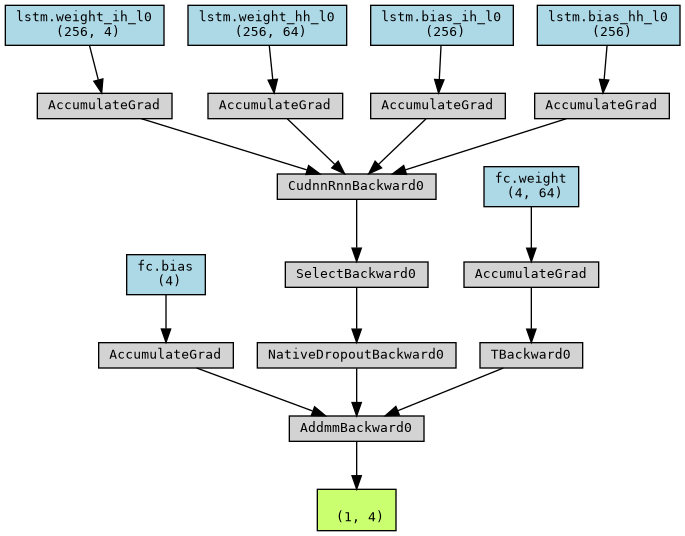

In [18]:
# Create the model instance
num_feature = 4  # Adjust this according to your features
model = NeuralNetwork(num_feature)

# Push to CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Generate a random input tensor
x = torch.randn(1, 10, num_feature, device=device)  # (batch_size, sequence_length, num_features)

# Visualize the model architecture using torchviz
try:
    y = model(x)  # Forward pass to generate graph
    graph = make_dot(y, params=dict(model.named_parameters()))
    graph.render("model_lstm", format="png")  # Save as PNG
    print("Model architecture saved as 'model_lstm.png'.")

    # Display the saved image in the Jupyter Notebook
    display(Image(filename="model_lstm.png"))
except Exception as e:
    print(f"Error plotting model architecture: {e}")

### Train dataset 10days

In [19]:
num_features = 5
model_10days = NeuralNetwork(num_features)
optimizer = optim.Adam(model_10days.parameters())

In [20]:
train_losses, valid_losses = [], []
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_10days = model_10days.to(device)

for epoch in range(1, epochs + 1):
    train_loss = train(model_10days, train_dataloader_10d, optimizer, mse, device)
    train_losses.append(train_loss)

    valid_loss = evaluate(model_10days, val_dataloader_10d, mse, device)
    valid_losses.append(valid_loss)

    print(f"[Epoch {epoch:02}/{epochs}] " f"Train Loss: {train_loss:.4f} | Valid loss: {valid_loss:.4f}")

/home/datgegt/miniconda3/envs/tf216/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/datgegt/miniconda3/envs/tf216/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20, 5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/datgegt/miniconda3/envs/tf216/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([51, 1])) that is different to the input size (torch.Size([51, 5])). This will likely lead to incorrect results du

[Epoch 01/50] Train Loss: 0.0582 | Valid loss: 0.0221
[Epoch 02/50] Train Loss: 0.0342 | Valid loss: 0.0128
[Epoch 03/50] Train Loss: 0.0145 | Valid loss: 0.0058
[Epoch 04/50] Train Loss: 0.0133 | Valid loss: 0.0097
[Epoch 05/50] Train Loss: 0.0108 | Valid loss: 0.0108
[Epoch 06/50] Train Loss: 0.0087 | Valid loss: 0.0063
[Epoch 07/50] Train Loss: 0.0085 | Valid loss: 0.0073
[Epoch 08/50] Train Loss: 0.0079 | Valid loss: 0.0049
[Epoch 09/50] Train Loss: 0.0082 | Valid loss: 0.0043
[Epoch 10/50] Train Loss: 0.0071 | Valid loss: 0.0064
[Epoch 11/50] Train Loss: 0.0060 | Valid loss: 0.0030
[Epoch 12/50] Train Loss: 0.0058 | Valid loss: 0.0057
[Epoch 13/50] Train Loss: 0.0052 | Valid loss: 0.0068
[Epoch 14/50] Train Loss: 0.0055 | Valid loss: 0.0027
[Epoch 15/50] Train Loss: 0.0054 | Valid loss: 0.0028
[Epoch 16/50] Train Loss: 0.0048 | Valid loss: 0.0087
[Epoch 17/50] Train Loss: 0.0048 | Valid loss: 0.0029
[Epoch 18/50] Train Loss: 0.0043 | Valid loss: 0.0077
[Epoch 19/50] Train Loss: 0.

In [21]:
model_10days.to(device)

X_test_10d = torch.tensor(X_test_10d).float().to(device)
y_test_10d = torch.tensor(y_test_10d).float().to(device)

with torch.no_grad():
    y_pred_10d = model_10days(X_test_10d)

y_pred_10d = y_pred_10d.cpu().numpy()
y_test_10d = y_test_10d.cpu().numpy()

y_pred_10d = y_pred_10d.reshape(-1, y_pred_10d.shape[-1])[:, -1]

### Train dataset 20 days

In [22]:
num_features = 5
model_20days = NeuralNetwork(num_features)
optimizer = optim.Adam(model_20days.parameters())

In [23]:
train_losses, valid_losses = [], []
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_20days = model_20days.to(device)

for epoch in range(1, epochs + 1):
    train_loss = train(model_20days, train_dataloader_20d, optimizer, mse, device)
    train_losses.append(train_loss)

    valid_loss = evaluate(model_20days, val_dataloader_20d, mse, device)
    valid_losses.append(valid_loss)

    print(f"[Epoch {epoch:02}/{epochs}] " f"Train Loss: {train_loss:.4f} | Valid loss: {valid_loss:.4f}")

[Epoch 01/50] Train Loss: 0.0580 | Valid loss: 0.0166
[Epoch 02/50] Train Loss: 0.0332 | Valid loss: 0.0149
[Epoch 03/50] Train Loss: 0.0129 | Valid loss: 0.0114
[Epoch 04/50] Train Loss: 0.0105 | Valid loss: 0.0148
[Epoch 05/50] Train Loss: 0.0102 | Valid loss: 0.0149
[Epoch 06/50] Train Loss: 0.0088 | Valid loss: 0.0134
[Epoch 07/50] Train Loss: 0.0075 | Valid loss: 0.0097
[Epoch 08/50] Train Loss: 0.0070 | Valid loss: 0.0165
[Epoch 09/50] Train Loss: 0.0059 | Valid loss: 0.0119
[Epoch 10/50] Train Loss: 0.0063 | Valid loss: 0.0054
[Epoch 11/50] Train Loss: 0.0076 | Valid loss: 0.0093
[Epoch 12/50] Train Loss: 0.0063 | Valid loss: 0.0084
[Epoch 13/50] Train Loss: 0.0052 | Valid loss: 0.0096
[Epoch 14/50] Train Loss: 0.0066 | Valid loss: 0.0037
[Epoch 15/50] Train Loss: 0.0055 | Valid loss: 0.0055
[Epoch 16/50] Train Loss: 0.0051 | Valid loss: 0.0037
[Epoch 17/50] Train Loss: 0.0046 | Valid loss: 0.0087
[Epoch 18/50] Train Loss: 0.0043 | Valid loss: 0.0091
[Epoch 19/50] Train Loss: 0.

In [24]:
model_20days.to(device)

X_test_20d = torch.tensor(X_test_20d).float().to(device)
y_test_20d = torch.tensor(y_test_20d).float().to(device)

with torch.no_grad():
    y_pred_20d = model_20days(X_test_20d)

y_pred_20d = y_pred_20d.cpu().numpy()
y_test_20d = y_test_20d.cpu().numpy()

y_pred_20d = y_pred_20d.reshape(-1, y_pred_20d.shape[-1])[:, -1]

### Train dataset all

In [25]:
num_features = 6
model_all = NeuralNetwork(num_features)
optimizer = optim.Adam(model_all.parameters())

In [26]:
epochs=100
train_losses, valid_losses = [], []
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_all = model_all.to(device)

for epoch in range(1, epochs + 1):
    train_loss = train(model_all, train_dataloader_all, optimizer, mse, device)
    train_losses.append(train_loss)

    valid_loss = evaluate(model_all, val_dataloader_all, mse, device)
    valid_losses.append(valid_loss)

    print(f"[Epoch {epoch:02}/{epochs}] " f"Train Loss: {train_loss:.4f} | Valid loss: {valid_loss:.4f}")

/home/datgegt/miniconda3/envs/tf216/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/datgegt/miniconda3/envs/tf216/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20, 6])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/datgegt/miniconda3/envs/tf216/lib/python3.11/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([51, 1])) that is different to the input size (torch.Size([51, 6])). This will likely lead to incorrect results du

[Epoch 01/100] Train Loss: 0.0559 | Valid loss: 0.0226
[Epoch 02/100] Train Loss: 0.0317 | Valid loss: 0.0142
[Epoch 03/100] Train Loss: 0.0146 | Valid loss: 0.0147
[Epoch 04/100] Train Loss: 0.0116 | Valid loss: 0.0083
[Epoch 05/100] Train Loss: 0.0102 | Valid loss: 0.0110
[Epoch 06/100] Train Loss: 0.0090 | Valid loss: 0.0143
[Epoch 07/100] Train Loss: 0.0086 | Valid loss: 0.0111
[Epoch 08/100] Train Loss: 0.0073 | Valid loss: 0.0102
[Epoch 09/100] Train Loss: 0.0067 | Valid loss: 0.0076
[Epoch 10/100] Train Loss: 0.0065 | Valid loss: 0.0131
[Epoch 11/100] Train Loss: 0.0075 | Valid loss: 0.0093
[Epoch 12/100] Train Loss: 0.0060 | Valid loss: 0.0162
[Epoch 13/100] Train Loss: 0.0064 | Valid loss: 0.0085
[Epoch 14/100] Train Loss: 0.0061 | Valid loss: 0.0046
[Epoch 15/100] Train Loss: 0.0049 | Valid loss: 0.0073
[Epoch 16/100] Train Loss: 0.0046 | Valid loss: 0.0071
[Epoch 17/100] Train Loss: 0.0054 | Valid loss: 0.0038
[Epoch 18/100] Train Loss: 0.0043 | Valid loss: 0.0058
[Epoch 19/

In [27]:
model_all.to(device)

X_test_all = torch.tensor(X_test_all).float().to(device)
y_test_all = torch.tensor(y_test_all).float().to(device)

with torch.no_grad():
    y_pred_all = model_all(X_test_all)

y_pred_all = y_pred_all.cpu().numpy()
y_test_all = y_test_all.cpu().numpy()

y_pred_all = y_pred_all.reshape(-1, y_pred_all.shape[-1])[:, -1]

### plot 3 model

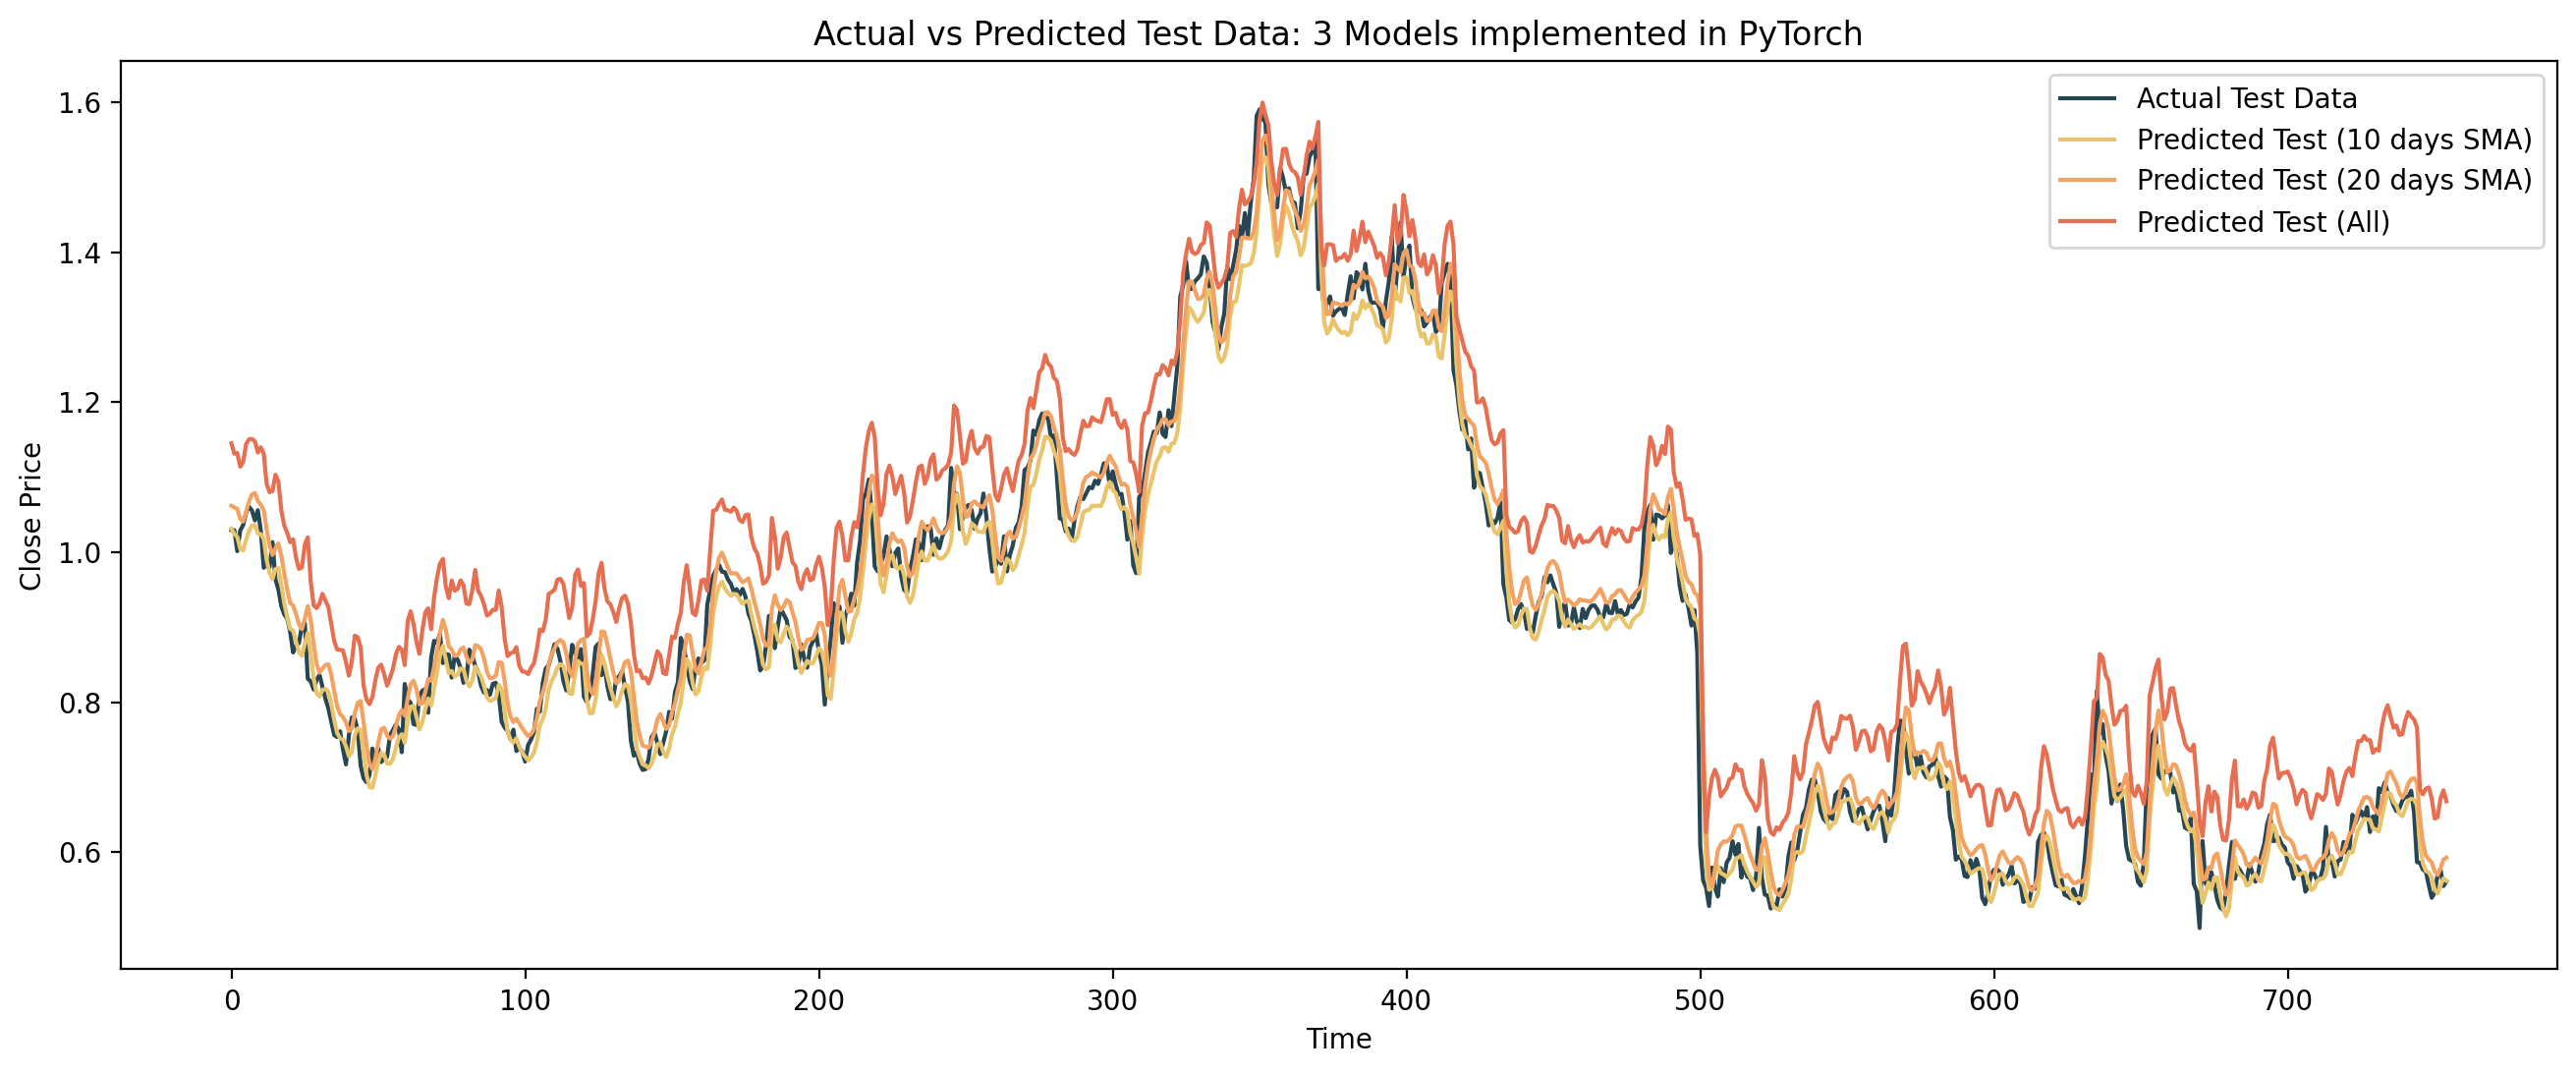

In [28]:
plt.figure(figsize=(16, 6), dpi=200)

plt.plot(y_test_10d, label='Actual Test Data', color='#264653')
plt.plot(y_pred_10d, label='Predicted Test (10 days SMA)', color='#e9c46a')
plt.plot(y_pred_20d, label='Predicted Test (20 days SMA)', color='#f4a261')
plt.plot(y_pred_all, label='Predicted Test (All)', color='#e76f51')

plt.title('Actual vs Predicted Test Data: 3 Models implemented in PyTorch')
plt.xlabel('Time')
plt.ylabel('Close Price')

plt.legend()
plt.show()


In [32]:
df.reset_index(inplace=True)

In [33]:
# Ensure same device for input and model
device = next(model_all.parameters()).device
last_sequence = torch.from_numpy(sequence_all[-1:, :, :]).float().to(device)

days_num = 10
predictions = []

with torch.no_grad():
    for _ in range(days_num):
        pred = model_all(last_sequence)           # (1, features)
        pred_np = pred.cpu().numpy().reshape(-1)  # (features,)
        predictions.append(pred_np)

        pred = pred.unsqueeze(1)                  # (1, 1, features)
        last_sequence = torch.cat((last_sequence, pred), dim=1)[:, 1:, :]

# Convert list to numpy array: shape (days_num, features)
predictions_ = np.array(predictions)

# Inverse transform using scalers
cols_to_inverse = ['Open', 'High', 'Low', 'Close']
inv_predictions = np.zeros((days_num, len(cols_to_inverse)))

for i, col in enumerate(cols_to_inverse):
    scaler = scalers_all[col]
    inv_predictions[:, i] = scaler.inverse_transform(predictions_[:, i].reshape(-1, 1)).flatten()

# Create DataFrame with predictions
df_pred = pd.DataFrame(inv_predictions, columns=cols_to_inverse)

# Add date column
last_date_in_df = df['Date'].iloc[-1]
next_dates = pd.date_range(start=last_date_in_df + pd.Timedelta(days=1), periods=days_num)
df_combined = pd.DataFrame({'Date': next_dates}).join(df_pred)

print(df_combined)


                       Date       Open       High        Low      Close
0 2025-08-09 00:00:00-04:00  22.798178  22.926321  22.284174  22.780577
1 2025-08-10 00:00:00-04:00  25.981989  26.121090  25.394033  25.970390
2 2025-08-11 00:00:00-04:00  30.439528  30.594013  29.747911  30.436256
3 2025-08-12 00:00:00-04:00  35.534439  35.706524  34.724270  35.540638
4 2025-08-13 00:00:00-04:00  40.433231  40.622246  39.509010  40.448498
5 2025-08-14 00:00:00-04:00  44.415901  44.618675  43.398895  44.438503
6 2025-08-15 00:00:00-04:00  47.163704  47.375965  46.082630  47.191341
7 2025-08-16 00:00:00-04:00  48.775654  48.993477  47.656956  48.806217
8 2025-08-17 00:00:00-04:00  49.568550  49.789116  48.431324  49.600536
9 2025-08-18 00:00:00-04:00  49.872292  50.093903  48.727943  49.904816


In [34]:
import plotly.graph_objects as go

# Giả sử df_combined đã chứa các cột: Date, Open, High, Low, Close
fig = go.Figure(data=[go.Candlestick(
    x=df_combined['Date'],
    open=df_combined['Open'],
    high=df_combined['High'],
    low=df_combined['Low'],
    close=df_combined['Close'],
    increasing_line_color='green',  # Màu khi giá tăng
    decreasing_line_color='red'     # Màu khi giá giảm
)])

fig.update_layout(
    title='Predicted Candlestick for the next 10 Days(Pytorch)',
    xaxis_title='Date',
    yaxis_title='Price($)',
    plot_bgcolor='rgba(255, 255, 255, 0.95)',
    paper_bgcolor='rgba(245, 245, 245, 1)',
    font=dict(family='Arial', size=14, color='#000000'),
    height=700,
    width=1450,
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    margin=dict(l=50, r=30, t=60, b=50),
    hovermode='x unified'
)

fig.update_xaxes(tickformat='%d-%m-%Y')

fig.show()
